In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile as zf
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, Normalizer, MinMaxScaler, StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,f1_score
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from ipywidgets import interact, IntSlider, FloatSlider
import pickle
from sklearn.metrics import confusion_matrix 

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
plt.style.use('seaborn-darkgrid')

In [4]:
path = r"C:\Users\Administrator\Documents\AIsat\Group_Project\credit_card_churn.csv"

In [5]:
#with zf.ZipFile(path, 'r') as myfile:
    #myfile.extractall()

In [6]:
#filePaths = r"C:\Users\Administrator\Documents\AIsat\Group_Project\datasets"

In [7]:
"""files = []
for file in os.listdir(filePaths):
    filePath = os.path.join(filePaths, file)
    for file in glob.glob(os.path.join(filePath, '*csv')):
        files.append(file)
    for xlsFile in glob.glob(os.path.join(filePath, '*xlsx')):
        files.append(xlsFile)
    
    """

"files = []\nfor file in os.listdir(filePaths):\n    filePath = os.path.join(filePaths, file)\n    for file in glob.glob(os.path.join(filePath, '*csv')):\n        files.append(file)\n    for xlsFile in glob.glob(os.path.join(filePath, '*xlsx')):\n        files.append(xlsFile)\n    \n    "

In [8]:
#files

In [9]:
df1 = pd.read_csv(path)
df1

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [10]:
df1.info(verbose= 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [11]:
df1.shape

(10127, 23)

In [12]:
# renaming the long columns
df1.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'NB_Classifier_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_Classifier_2'}, 
          inplace=True)

In [13]:
df1

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  NB_Classifier_1  \
0                    1.625                  0.061         0.000093   
1                    3.714                  0.105         0.000057   
2                    2.333                  0.000         0.000021   
3                    2.333                  0.760         0.000134   
4                    2.500                  0.000         0.000022   
...                    ...                    ...              ... 

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [15]:
#checking for missing values
df1.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
NB_Classifier_1             0
NB_Classifier_2             0
dtype: int64

In [16]:
df1['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [17]:
#checking for duplicate
df1.duplicated().sum()


0

In [18]:
print('Maximum Age', df1.Customer_Age.max())
print('Minimum Age', df1.Customer_Age.min())

Maximum Age 73
Minimum Age 26


In [19]:
bins = [20, 35, 50, 100]
labels = ['Young Adult', 'Adult', 'Senior']
df1['Age_Group'] = pd.cut(df1['Customer_Age'], bins= bins, labels= labels)


In [20]:
#mapping the categorical data
catgorical = df1.select_dtypes('object')
catgorical

Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Unknown   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M         Unknown       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          Blue  
3      Less than $40K          Blue  
4         $60K - $80K          Blue  
...               ...           ...  
10122     $40K - $60K          Blue  
10123     $40K - $60K          Blue  
10124  Less than $40K          Blue  
10125     $40K - $60K          Blue  
10126  Less than $40K        Silver  

[10127 rows x 6 columns]

In [21]:
def bar(df, column, figsize=[8,6]):
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=figsize)
    color = sb.color_palette()[0]
    base_order = df[column].value_counts().index
    bar = sb.countplot(data=df, x=column, color=color, order=base_order)
    plt.title(column + ' '+ 'Distribution')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.xticks(rotation=20)

In [22]:
#checking for categorical columns
catgorical.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

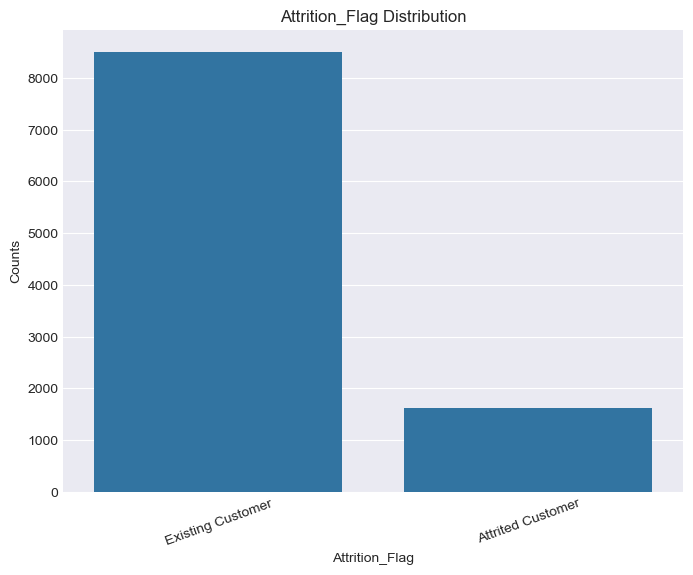

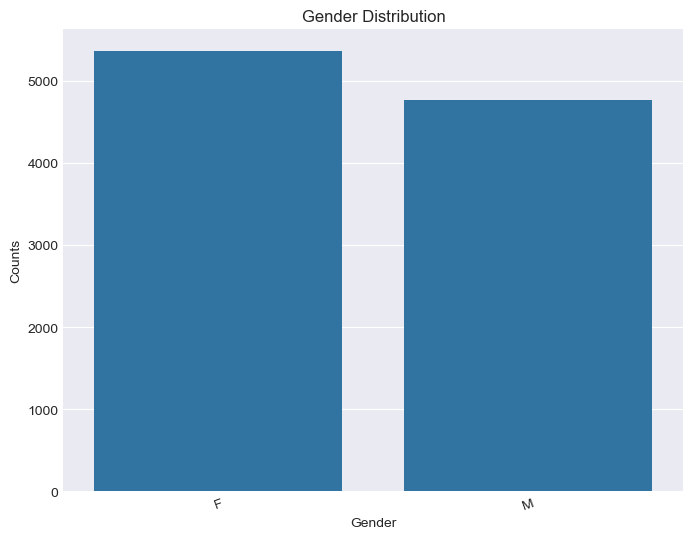

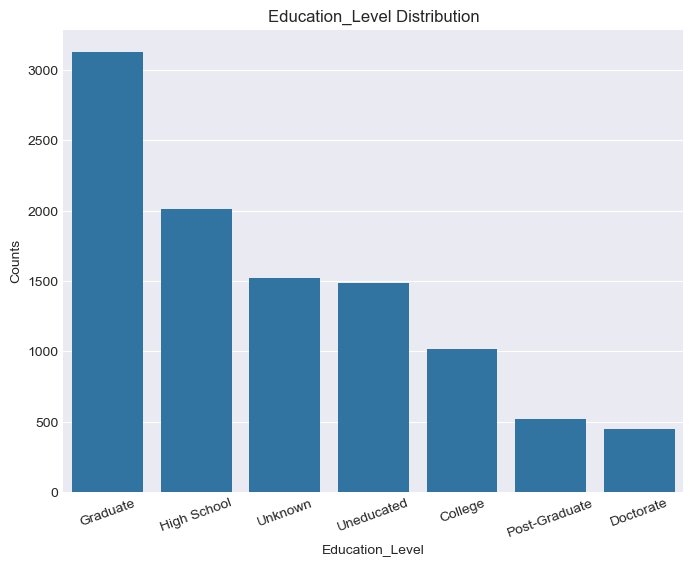

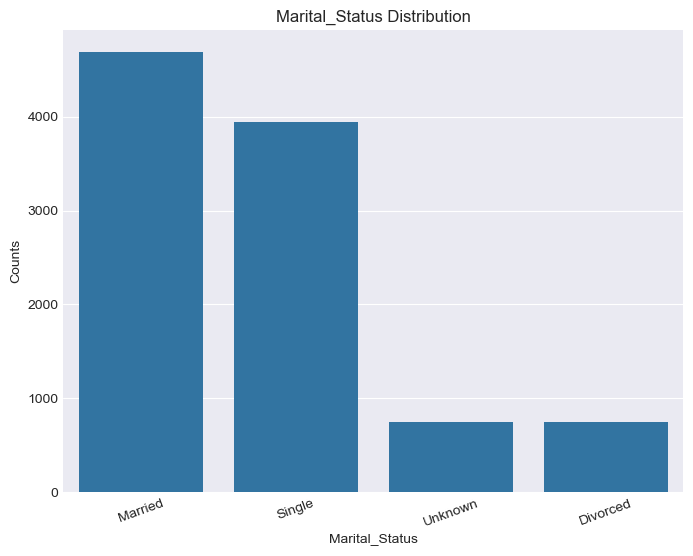

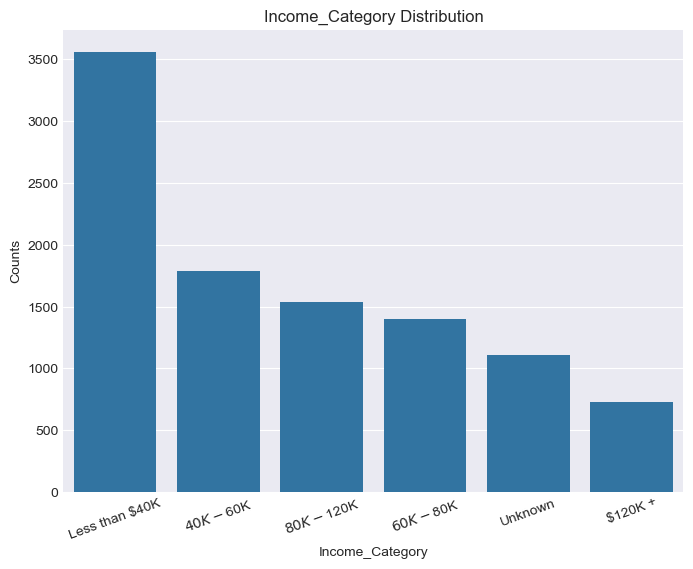

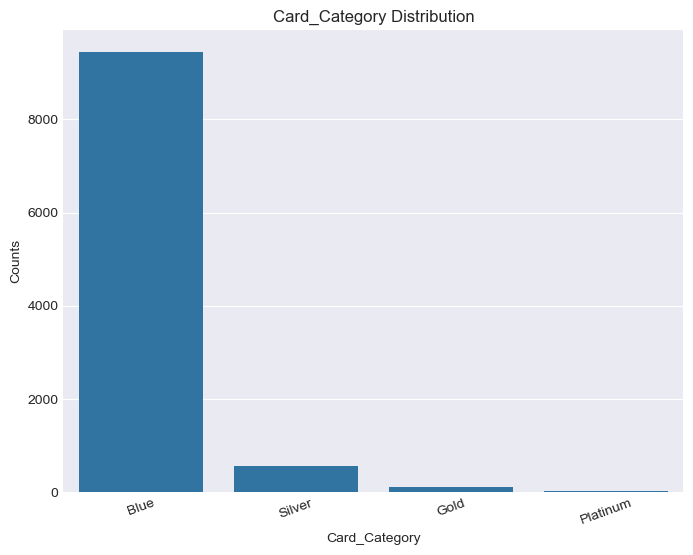

In [23]:
for cate in catgorical.columns:
    bar(df1, cate)

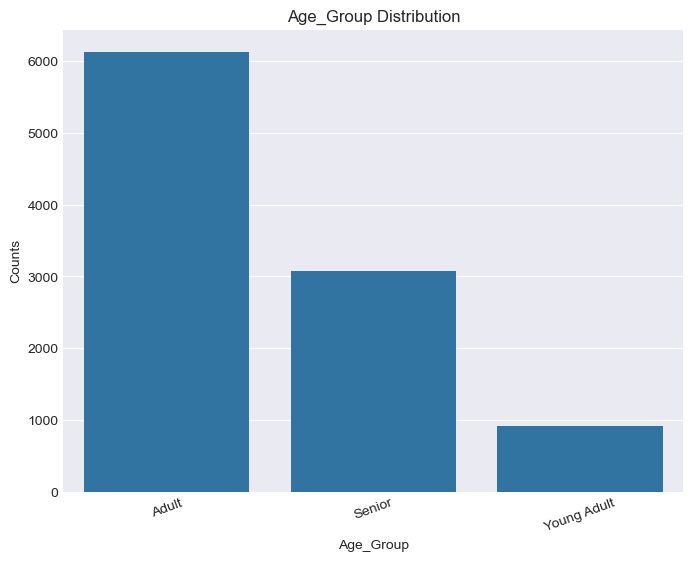

In [24]:
bar(df1, 'Age_Group')

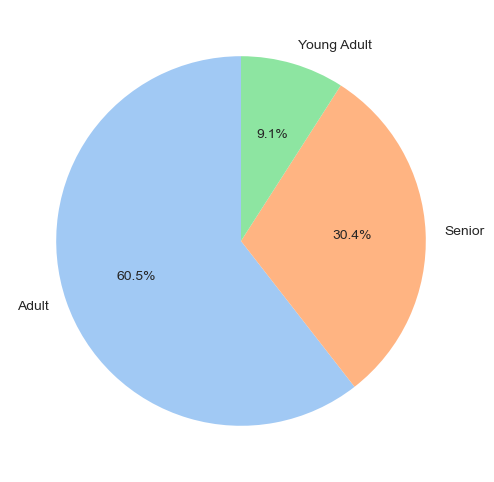

In [25]:
age_group_counts = df1['Age_Group'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'));

In [26]:
number = df1.select_dtypes('number')
number

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
0      768805383            45                3              39   
1      818770008            49                5              44   
2      713982108            51                3              36   
3      769911858            40                4              34   
4      709106358            40                3              21   
...          ...           ...              ...             ...   
10122  772366833            50                2              40   
10123  710638233            41                2              25   
10124  716506083            44                1              36   
10125  717406983            30                2              36   
10126  714337233            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  NB_Classifier_1  \
0                    1.625                  0.061         0.000093   
1                    3.714                  0.105         0.000057   
2                    2.333                  0.000         0.000021   
3                    2.333                  0.760         0.000134   
4                    2.500                  0.000         0.000022   
...                    ...                    ...              ...   
10122                0.857                  0.462         0.000191   
10123                0.683                  0.511         0.995270   
10124                0.818                  0.000         0.997880   
10125          

In [27]:
number.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2'],
      dtype='object')

In [28]:
df1.describe().T

count          mean           std           min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  7.080821e+08   
Customer_Age              10127.0  4.632596e+01  8.016814e+00  2.600000e+01   
Dependent_count           10127.0  2.346203e+00  1.298908e+00  0.000000e+00   
Months_on_book            10127.0  3.592841e+01  7.986416e+00  1.300000e+01   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00  1.000000e+00   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00  0.000000e+00   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00  0.000000e+00   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03  1.438300e+03   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02  0.000000e+00   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03  3.000000e+00   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01  0.000000e+00   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03  5.100000e+02   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01  1.000000e+01   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01  0.000000e+00   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01  0.000000e+00   
NB_Classifier_1           10127.0  1.599975e-01  3.653010e-01  7.664200e-06   
NB_Classifier_2           10127.0  8.400026e-01  3.653010e-01  4.199800e-04   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   
NB_Classifier_1           9.898300e-05  1.814600e-04  3.373000e-04   
NB_Classifier_2           9.996600e-01  9.998200e-01  9.999000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01  
NB_Classifier_1           9.995800e-01  
NB_Classifier_2           9.999900e-01

<Figure size 2500x2000 with 0 Axes>

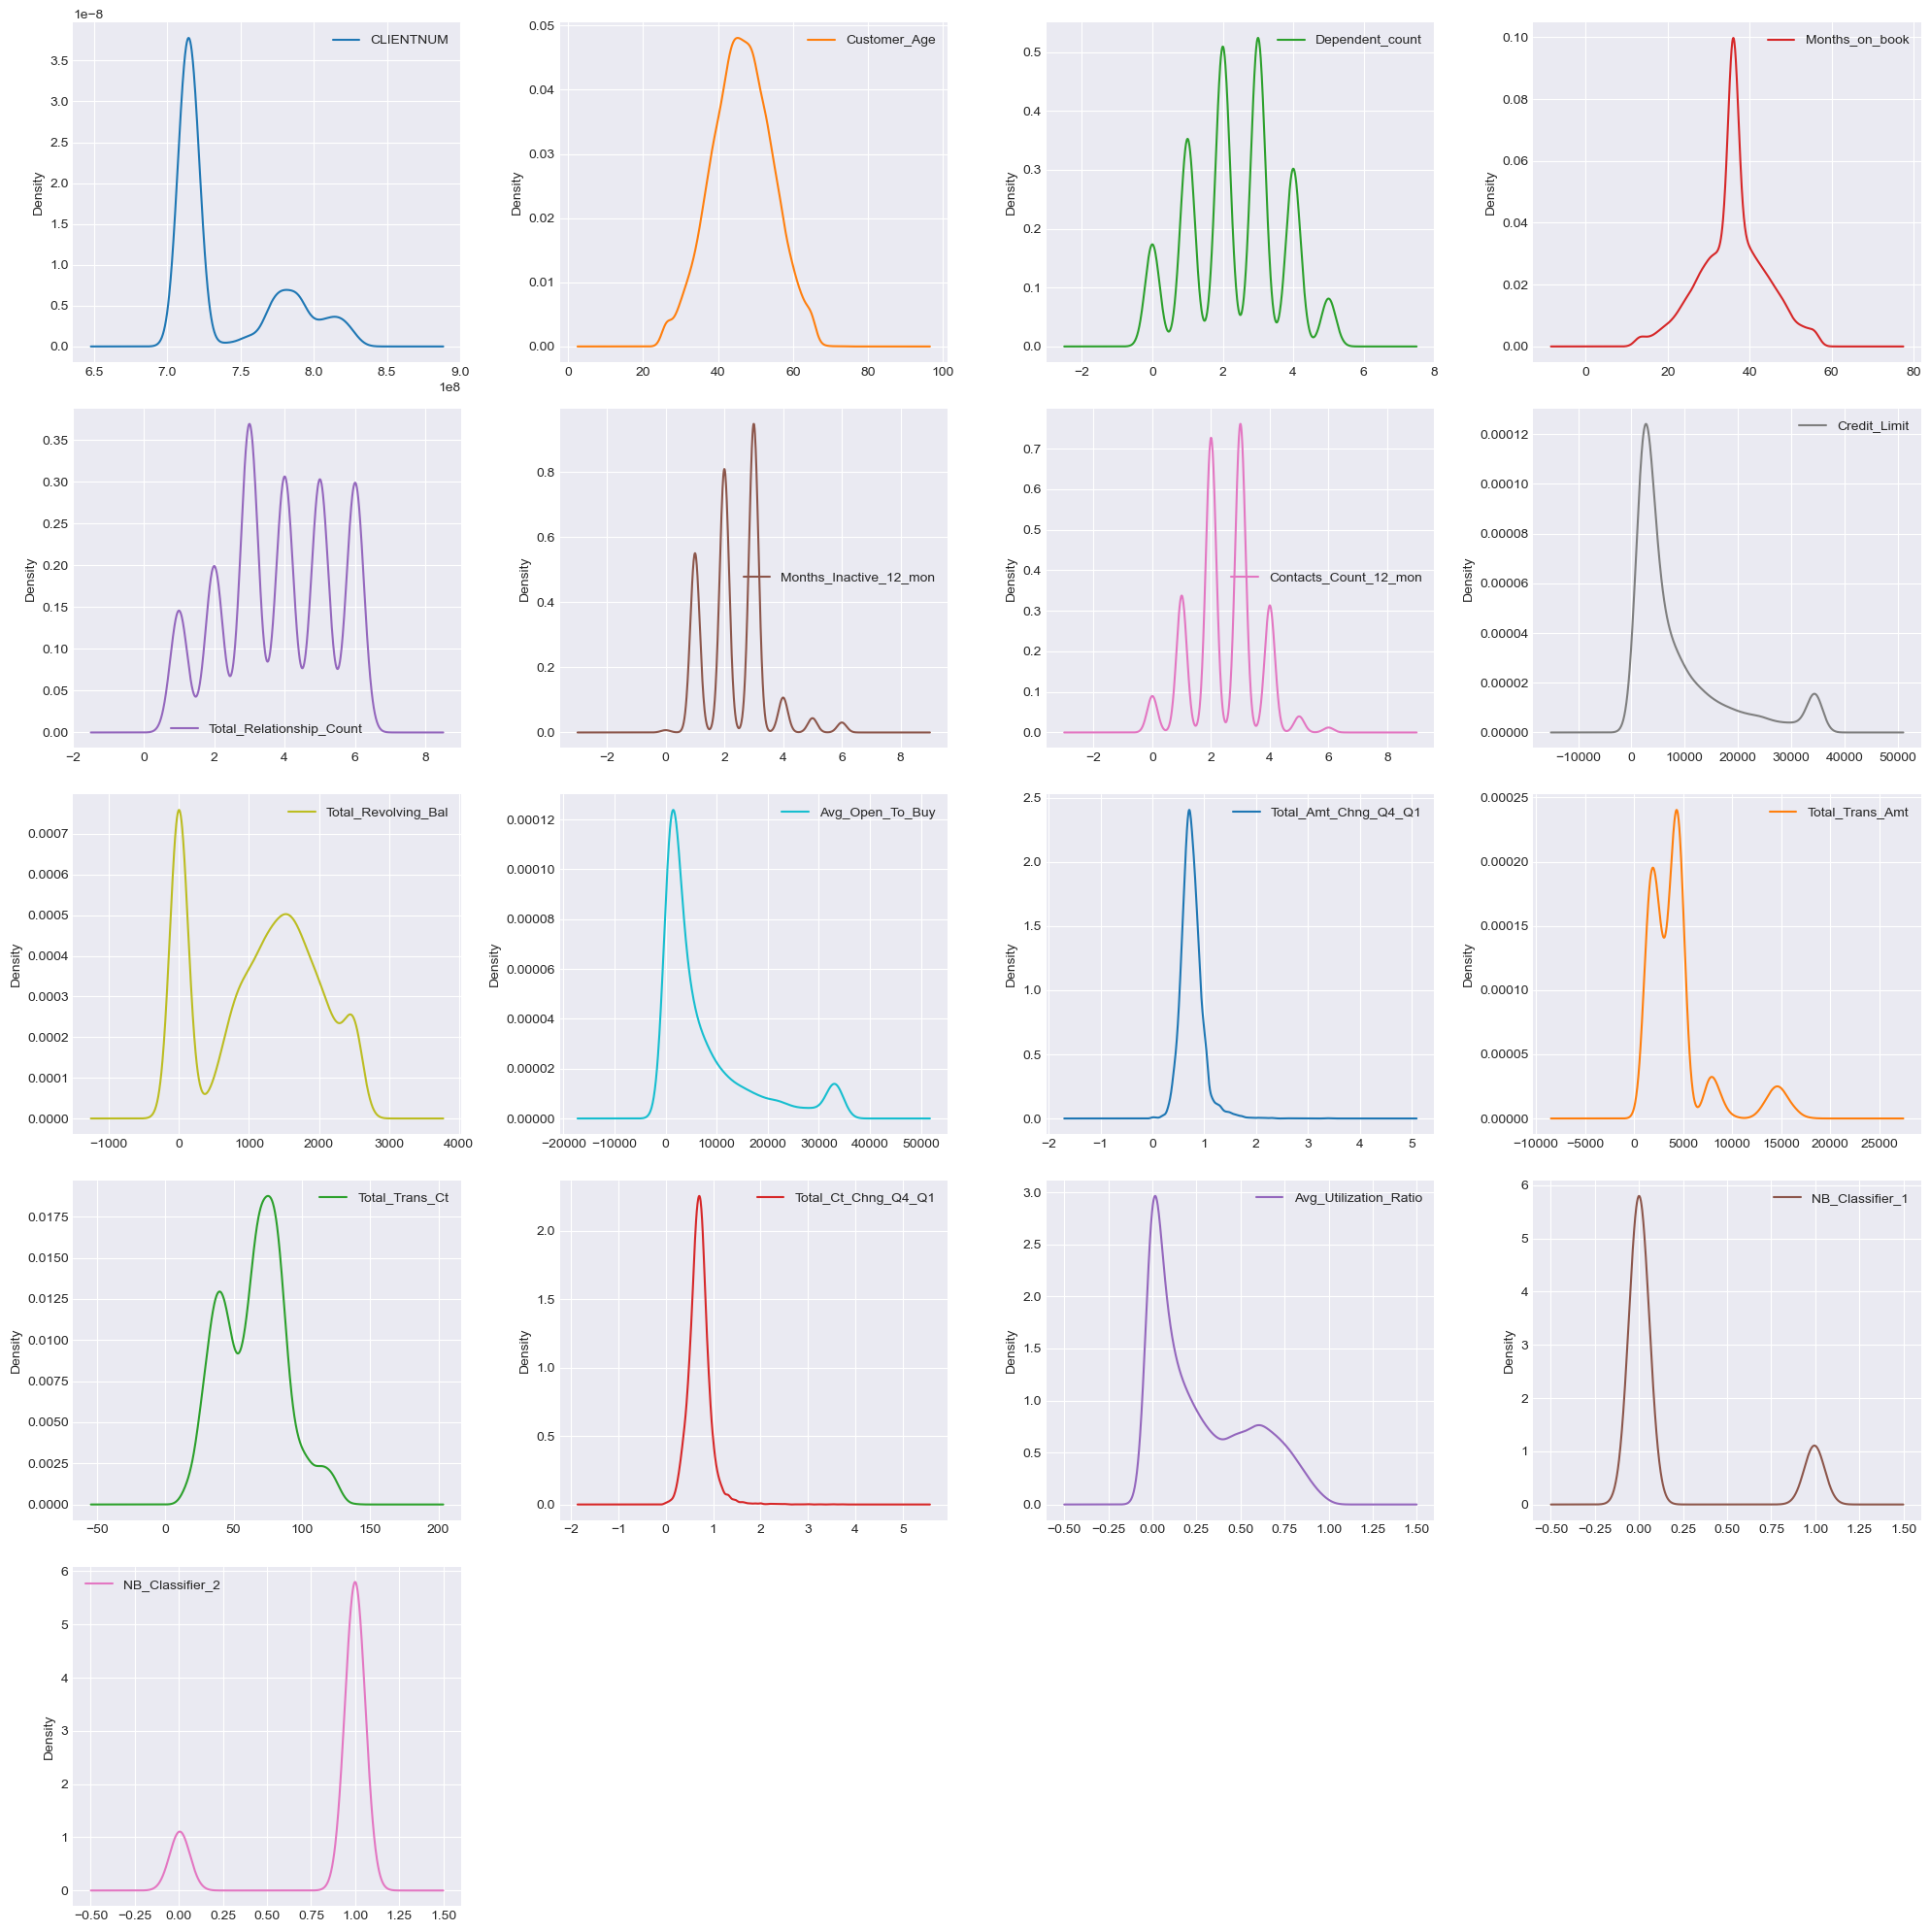

In [29]:
plt.figure(figsize=(25, 20), dpi= 100)
df1.plot(kind='density', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

<Figure size 1500x1200 with 0 Axes>

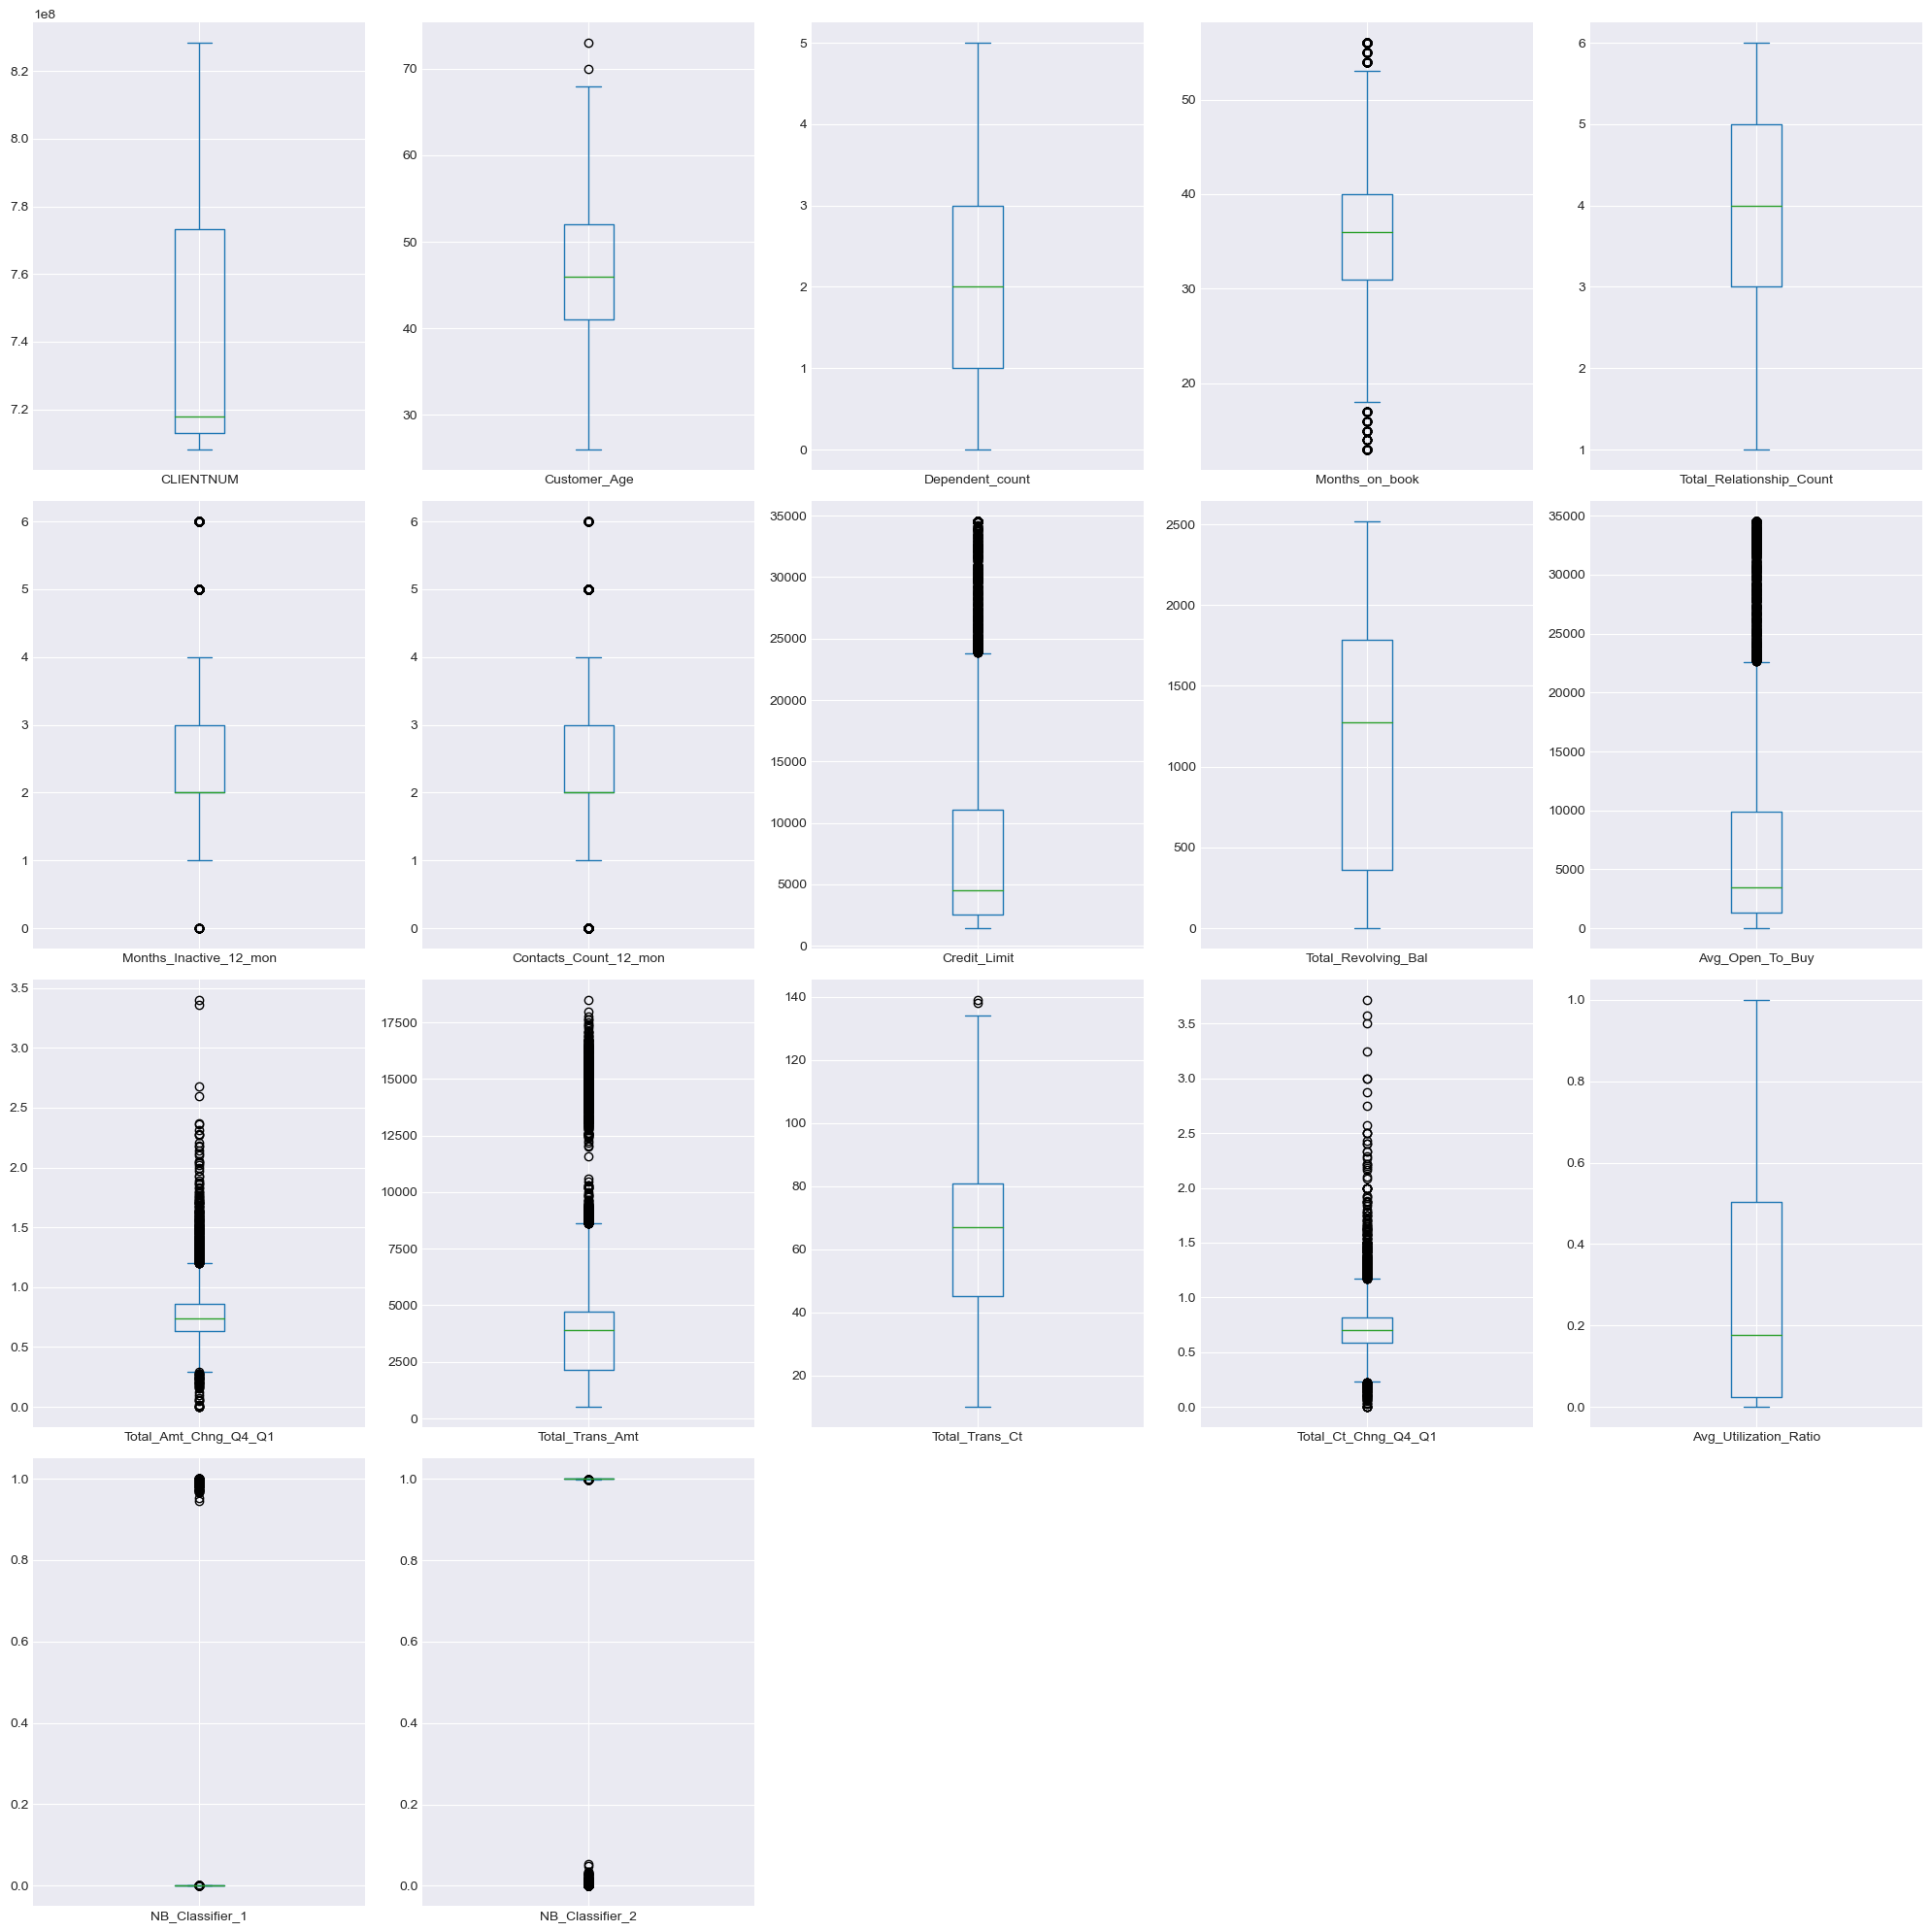

In [30]:
plt.figure(figsize=(25, 20), dpi=60)
df1.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Customer Age')

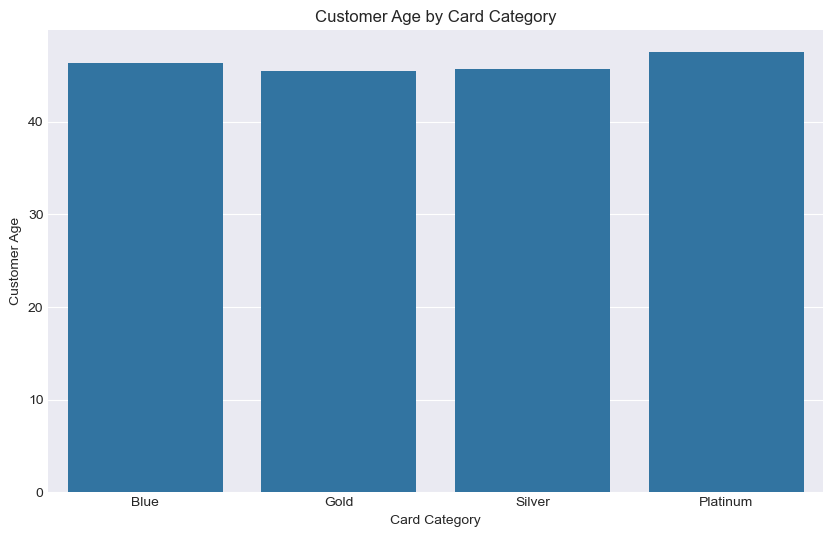

In [31]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.barplot(data= df1, x = 'Card_Category', y= 'Customer_Age', errorbar= None, color= color);
plt.title('Customer Age by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Customer Age')

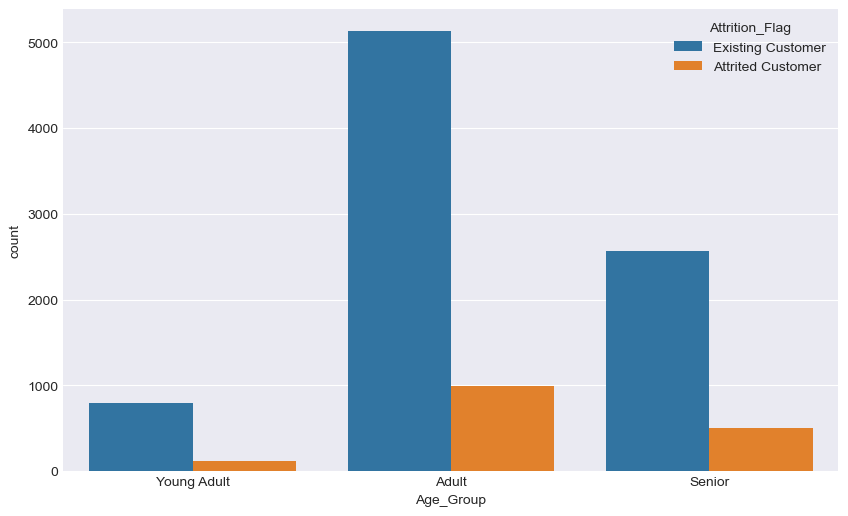

In [32]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.countplot(data= df1, x= 'Age_Group', hue= 'Attrition_Flag');

<Axes: xlabel='Education_Level', ylabel='count'>

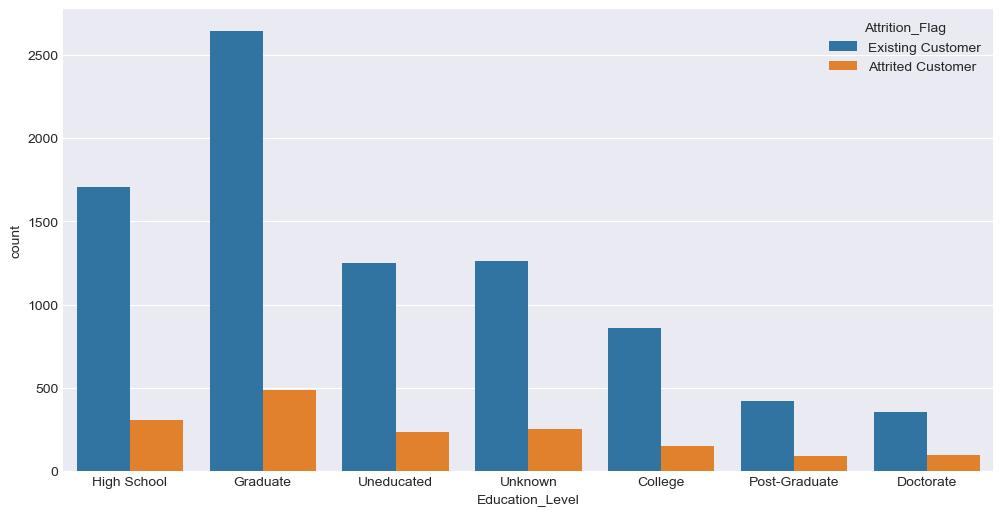

In [33]:

plt.figure(figsize= [12,6])
sb.countplot(data= df1, x= 'Education_Level', hue= 'Attrition_Flag')

<Axes: xlabel='Gender', ylabel='count'>

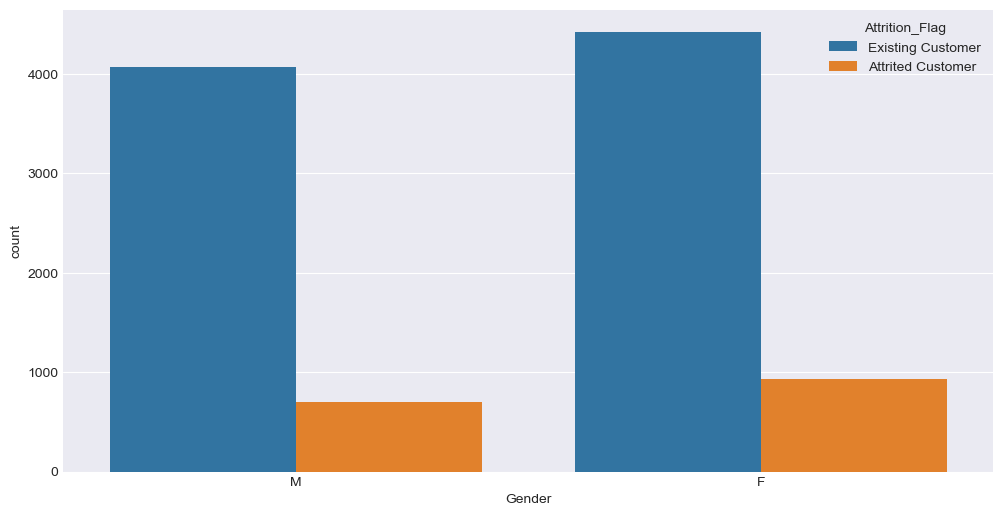

In [34]:
plt.figure(figsize= [12,6])
sb.countplot(data= df1, x= 'Gender', hue= 'Attrition_Flag')

In [35]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'Age_Group'],
      dtype='object')

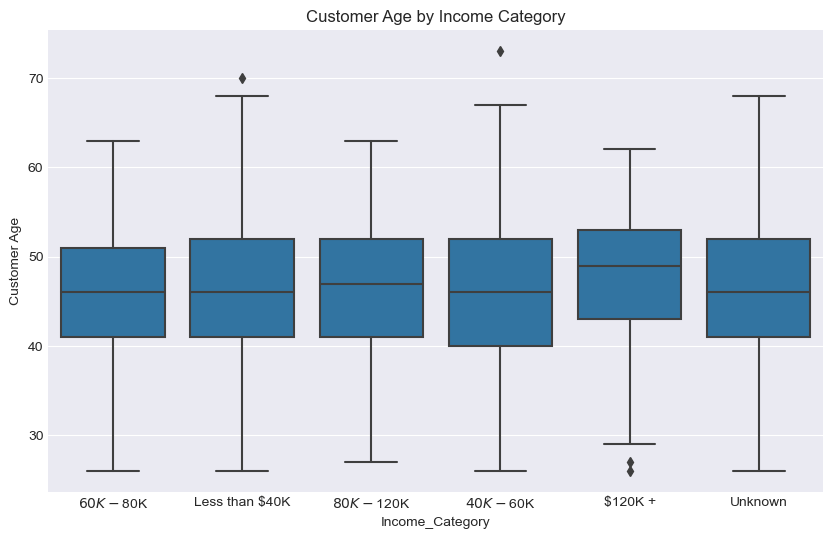

In [36]:
color = sb.color_palette()[0]
plt.figure(figsize= [10,6])
sb.boxplot(data= df1, x = 'Income_Category', y= 'Customer_Age', color= color);
plt.title('Customer Age by Income Category')
plt.xlabel('Income_Category')
plt.ylabel('Customer Age');

## Financial Information

<Axes: >

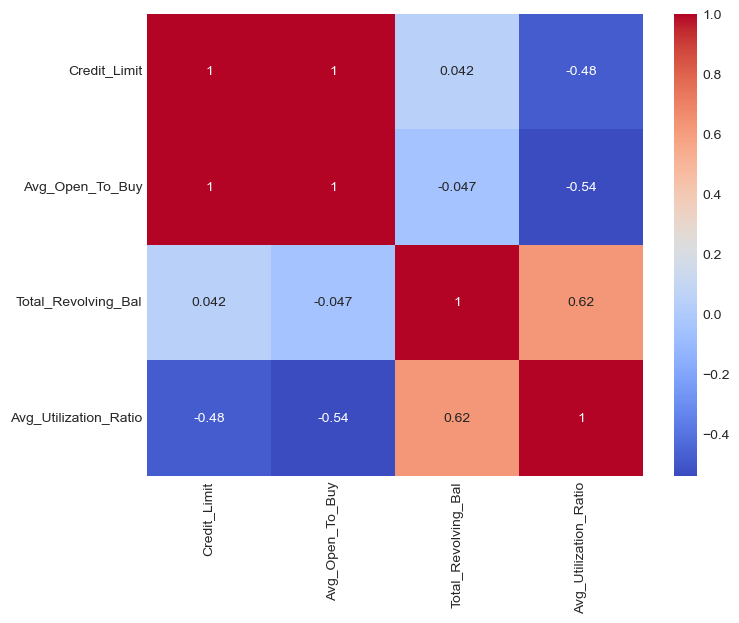

In [37]:
plt.figure(figsize=(8, 6))
sb.heatmap(df1[['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']].corr(),
           annot= True, cmap= 'coolwarm')

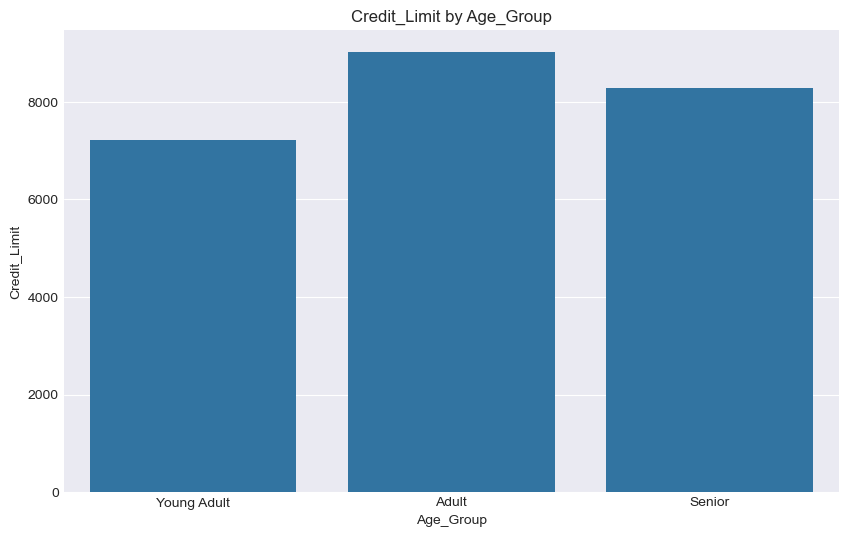

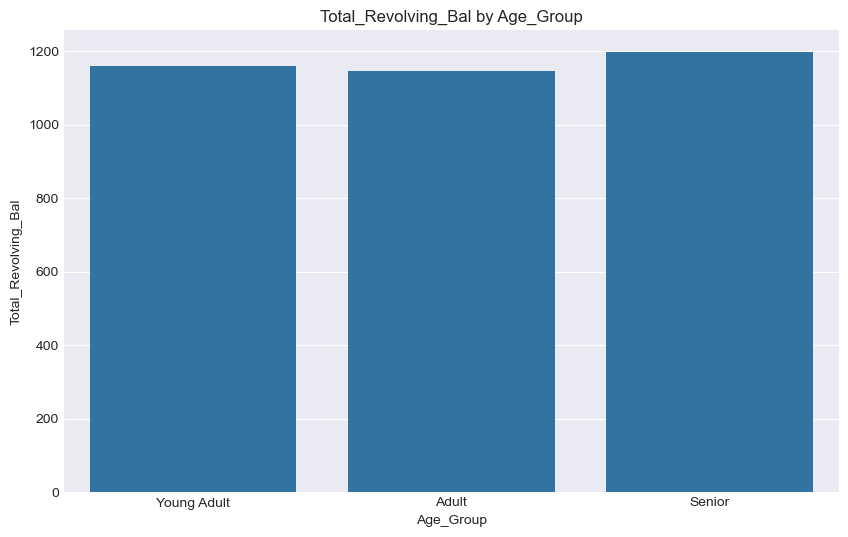

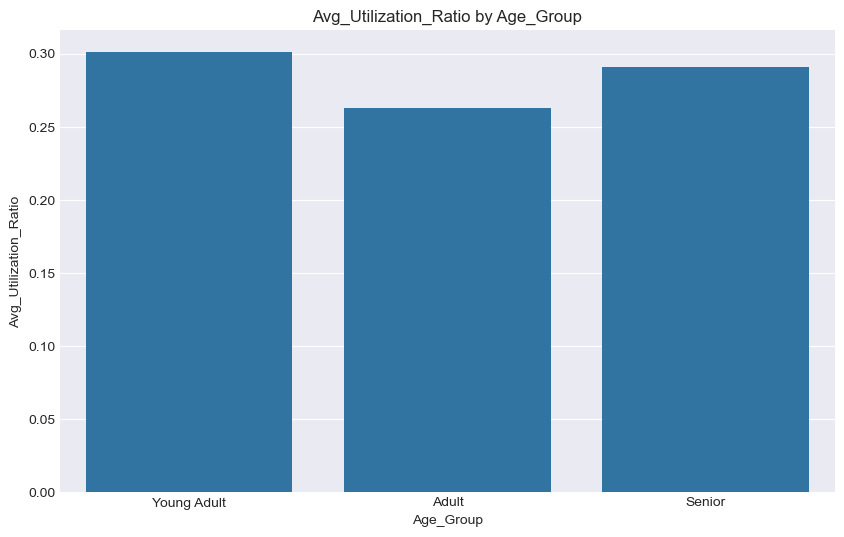

In [38]:
financialColumns = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio']
def finbar(df, x, y ):
    color = sb.color_palette()[0]
    plt.figure(figsize= [10,6])
    sb.barplot(data= df1, x = x, y= y, color= color, errorbar= None);
    plt.title(f'{y} by {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    
for i in financialColumns:
    finbar(df1, 'Age_Group', i)

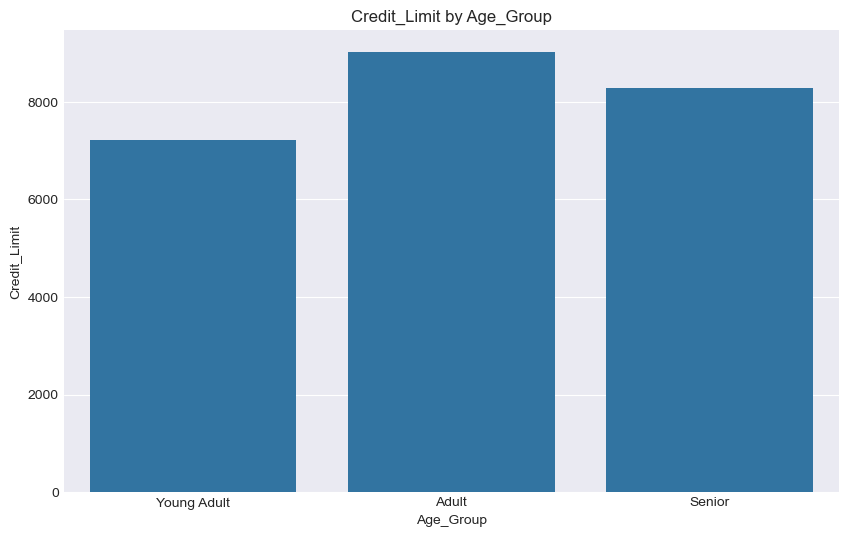

In [39]:
finbar(df1, 'Age_Group', 'Credit_Limit')

## Transaction and Engagement

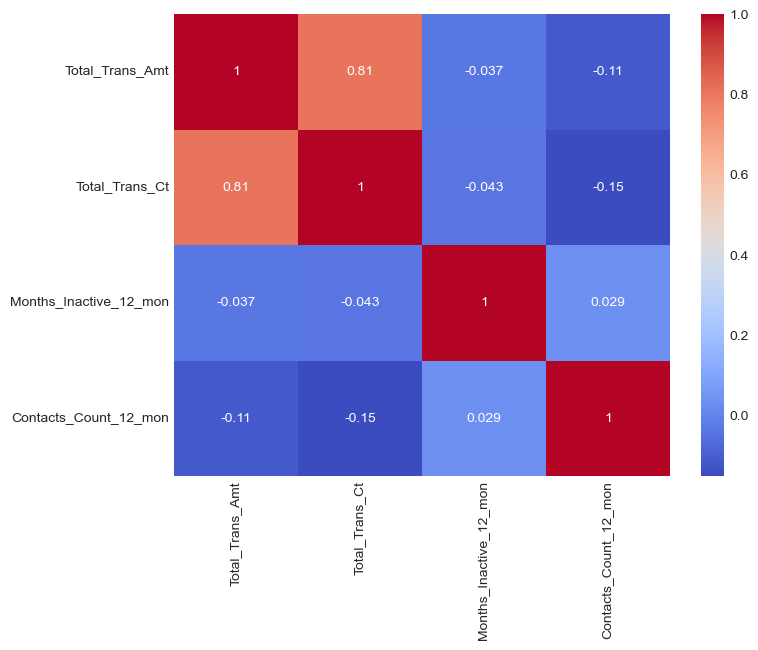

In [40]:
plt.figure(figsize=(8, 6))
sb.heatmap(df1[['Total_Trans_Amt', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']].corr(),
           annot= True, cmap= 'coolwarm');

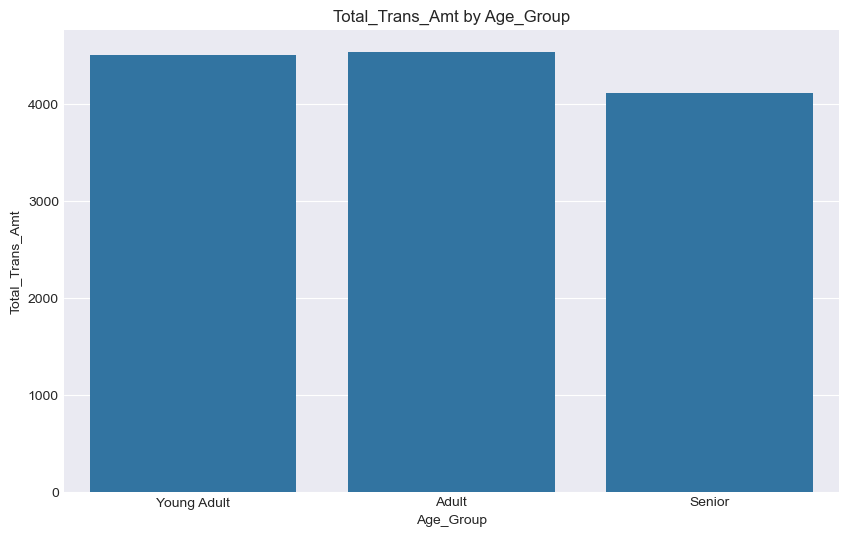

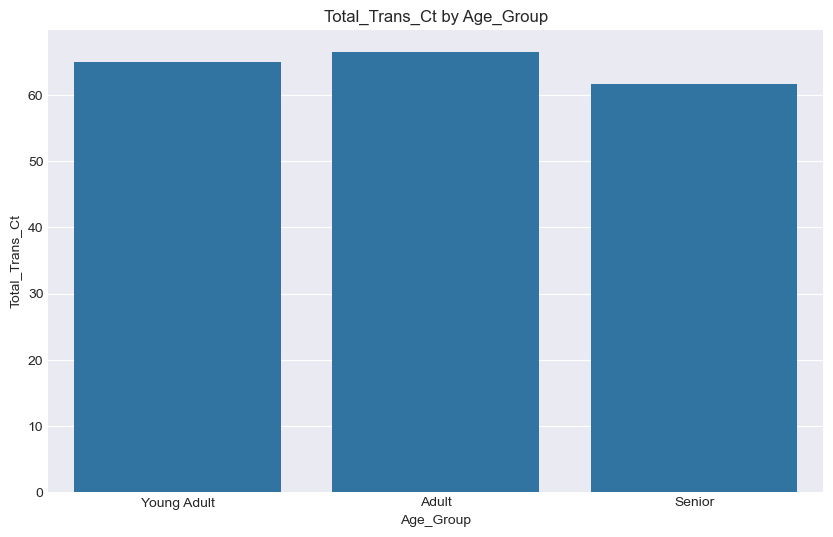

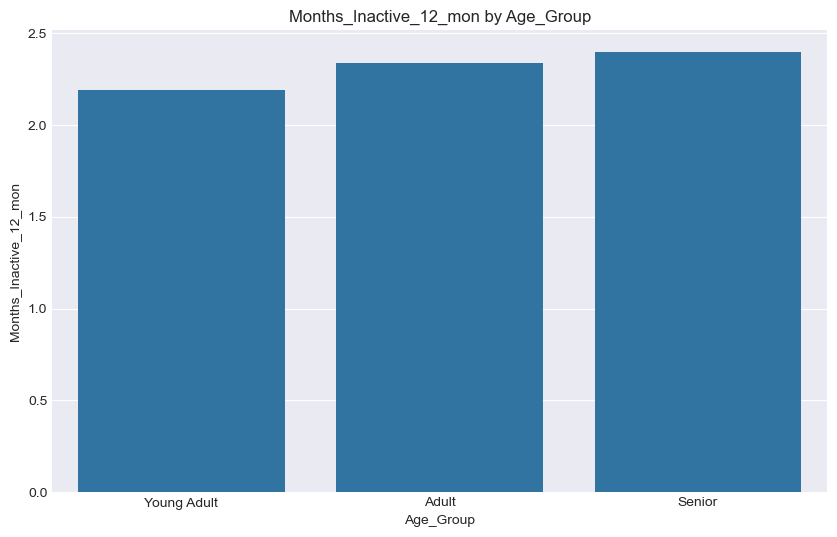

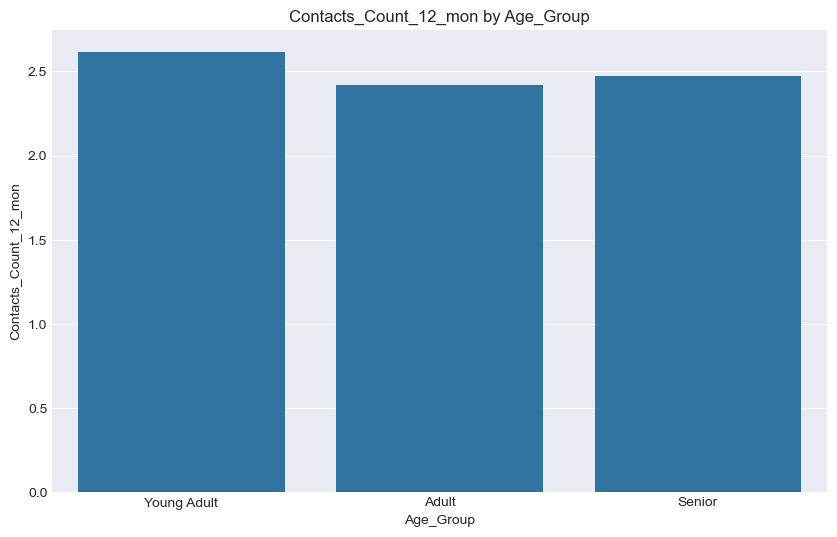

In [41]:
transEngColumns = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
def finbar(df, x, y ):
    color = sb.color_palette()[0]
    plt.figure(figsize= [10,6])
    sb.barplot(data= df1, x = x, y= y, color= color, errorbar= None);
    plt.title(f'{y} by {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    
for i in transEngColumns:
    finbar(df1, 'Age_Group', i)

## Customer Demographics

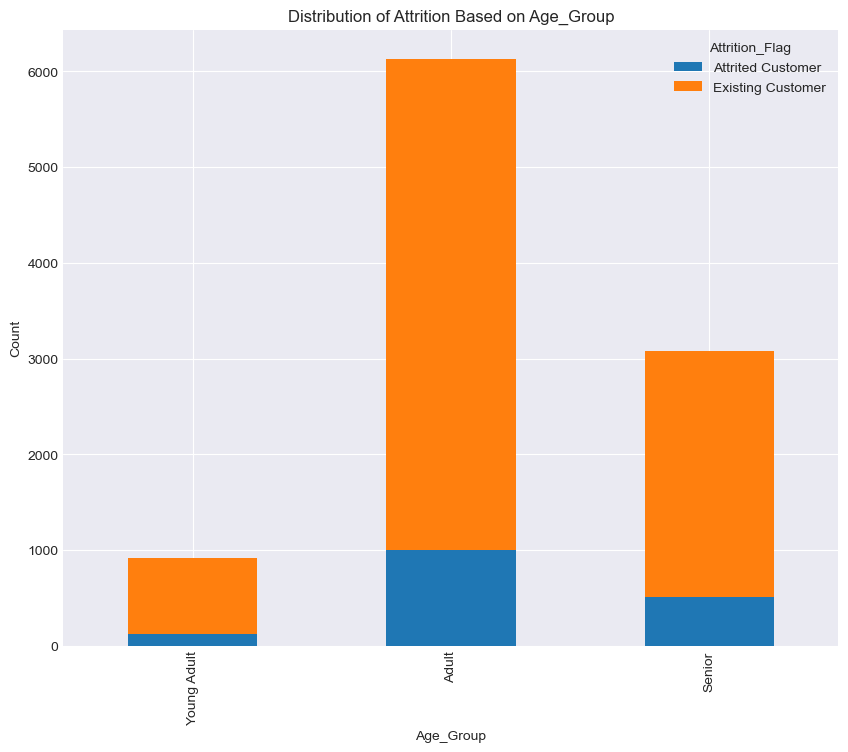

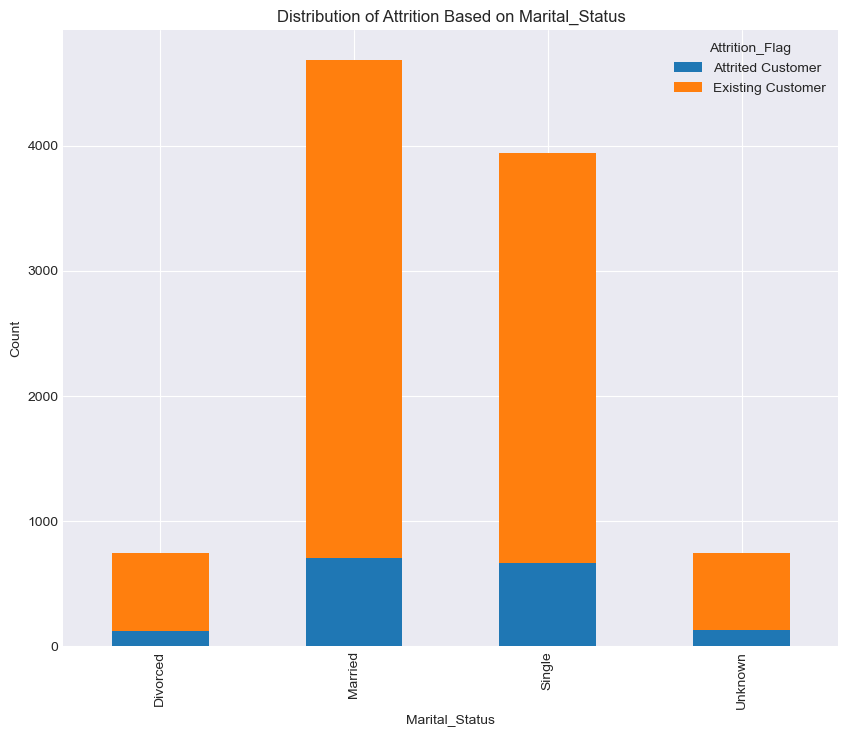

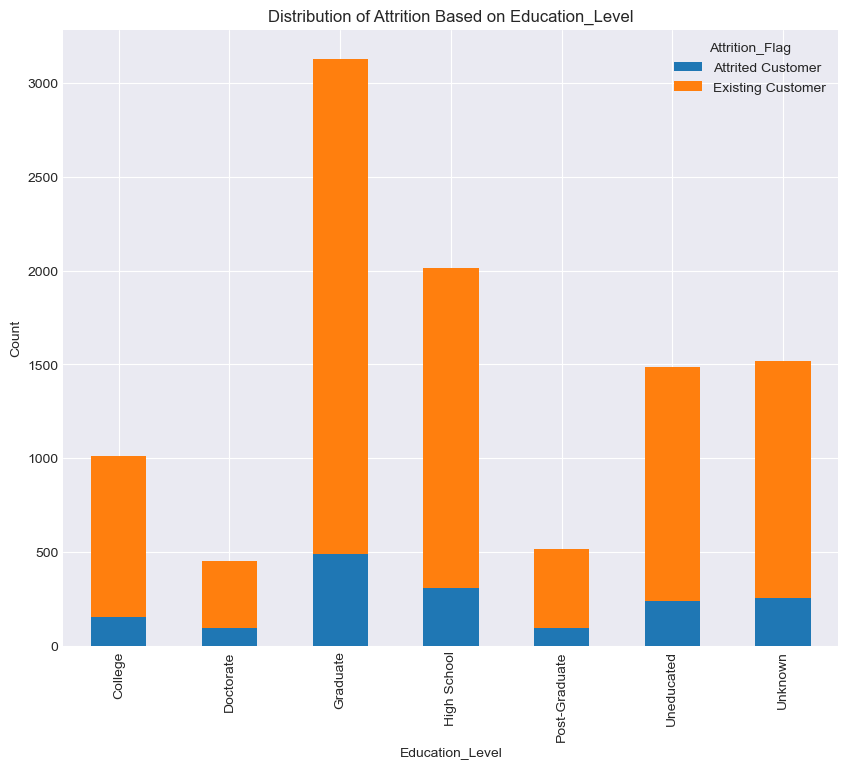

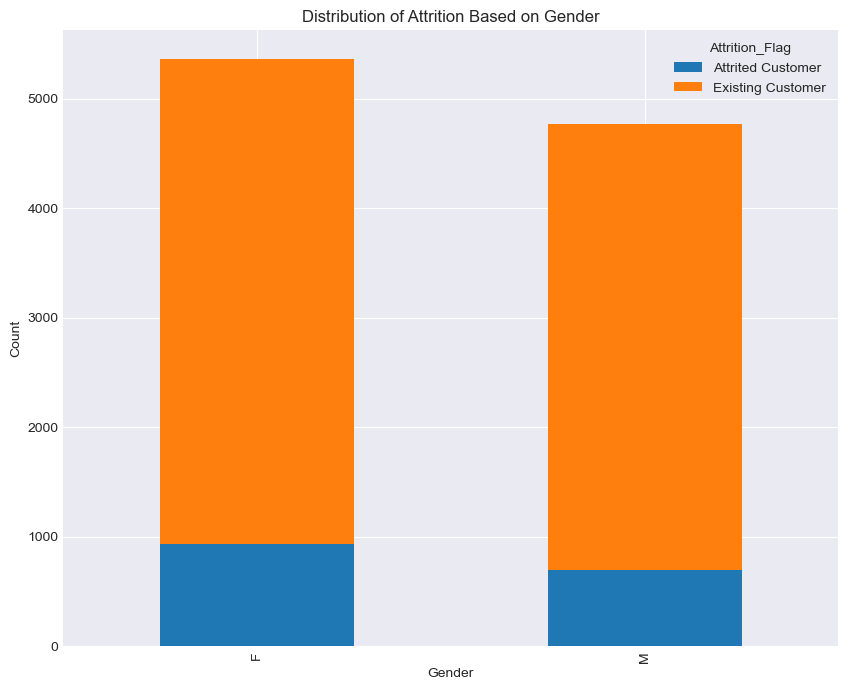

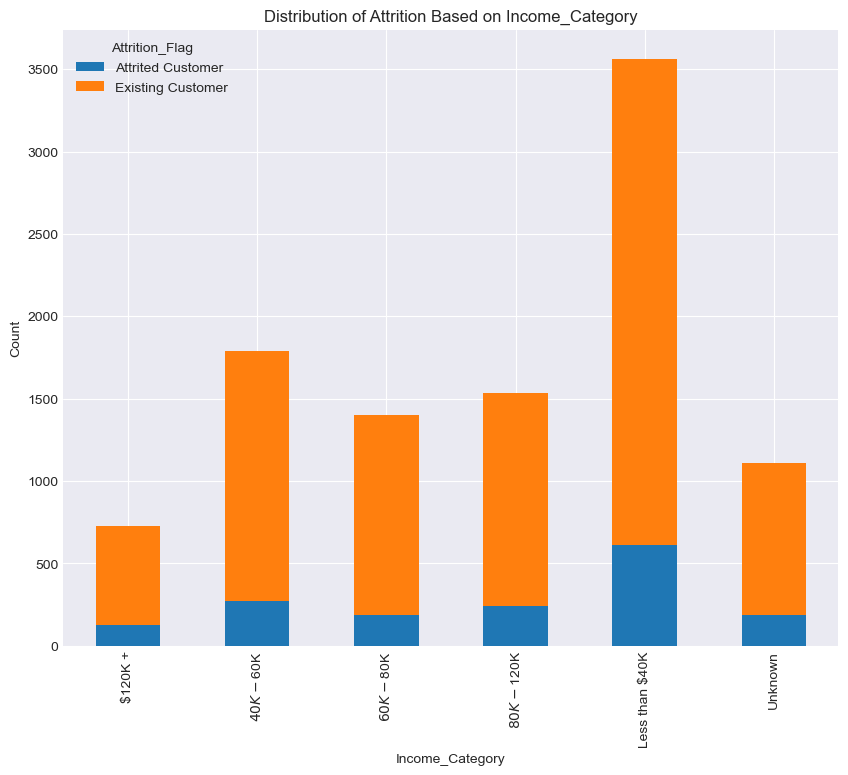

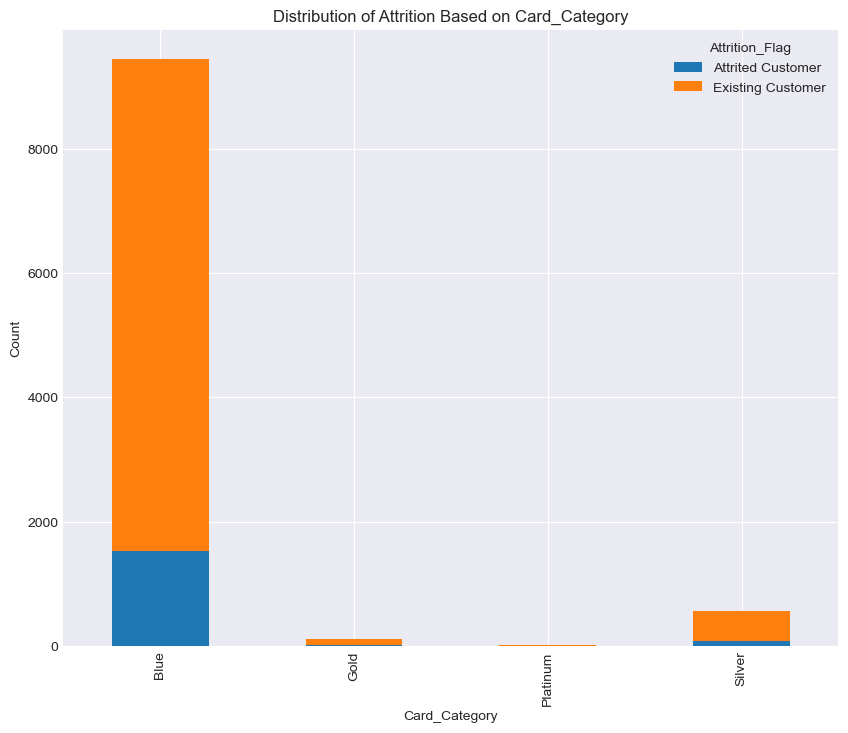

In [42]:
demoColumns = ['Age_Group', 'Marital_Status', 'Education_Level', 'Gender', 'Income_Category', 'Card_Category' ]
def churn(column):
        finChurn = df1.groupby([column, 'Attrition_Flag']).size().unstack()
        return finChurn.plot(kind='bar', stacked=True, figsize=(10,8), 
                             title = 'Distribution of Attrition Based on' + ' ' + i, xlabel = column, ylabel = 'Count')
for i in demoColumns:
    churn(i)  

In [43]:
df1['Months_on_book'].max()

56

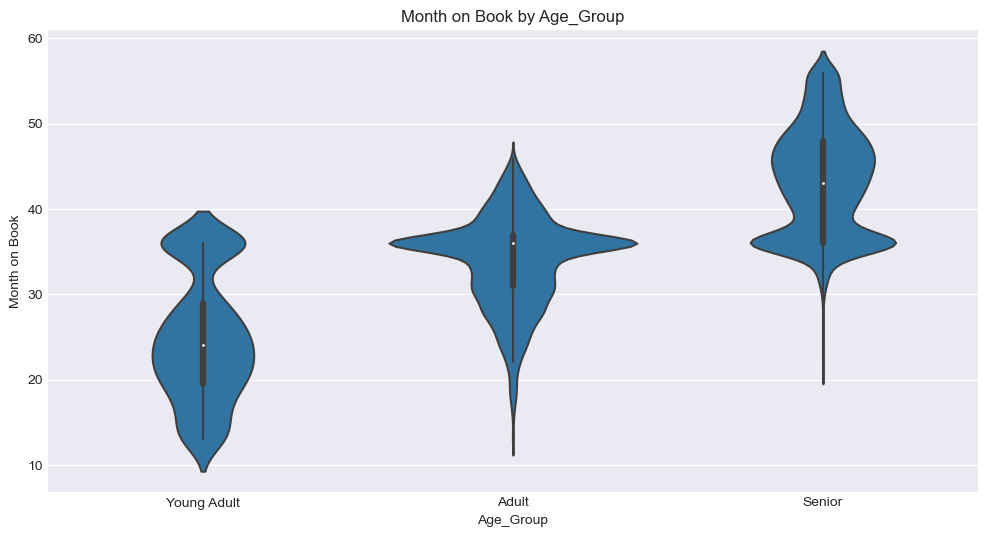

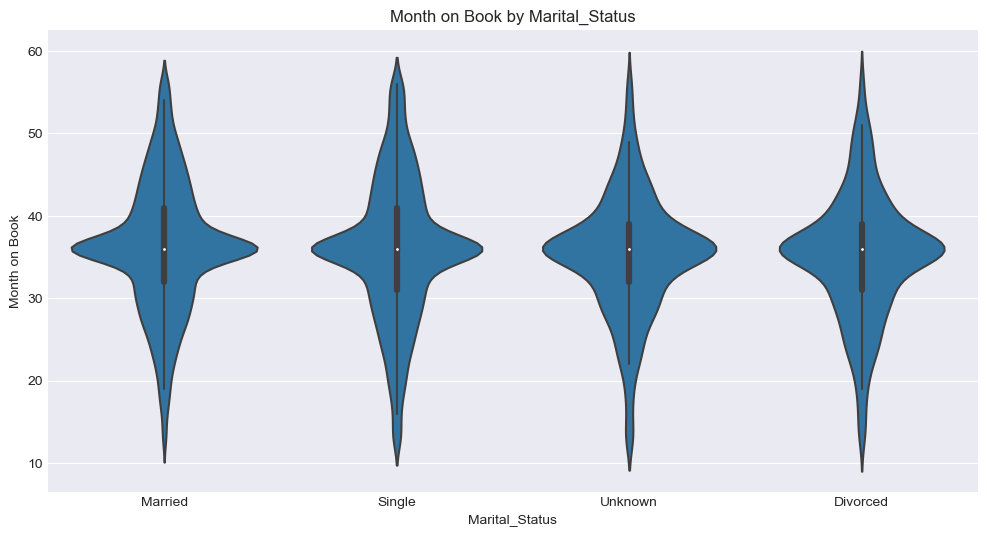

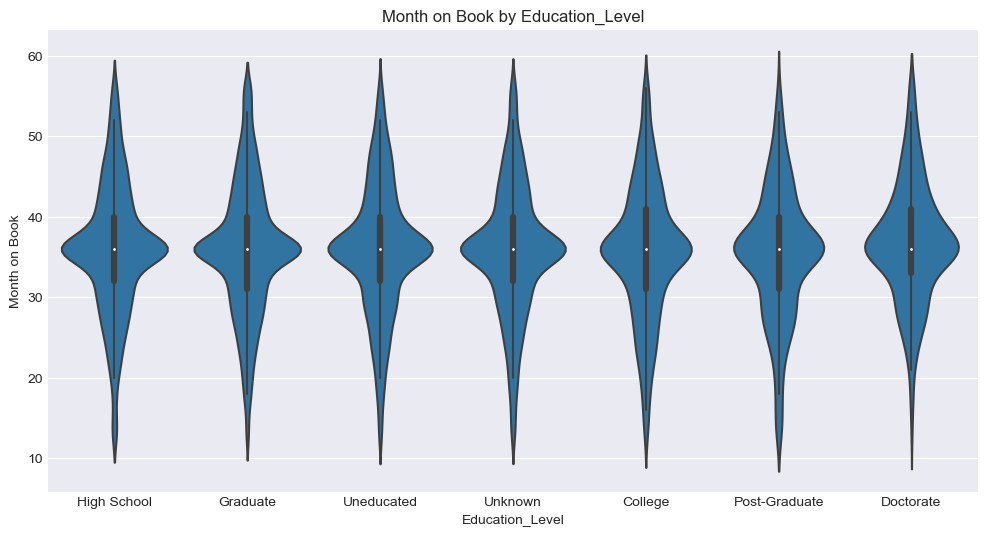

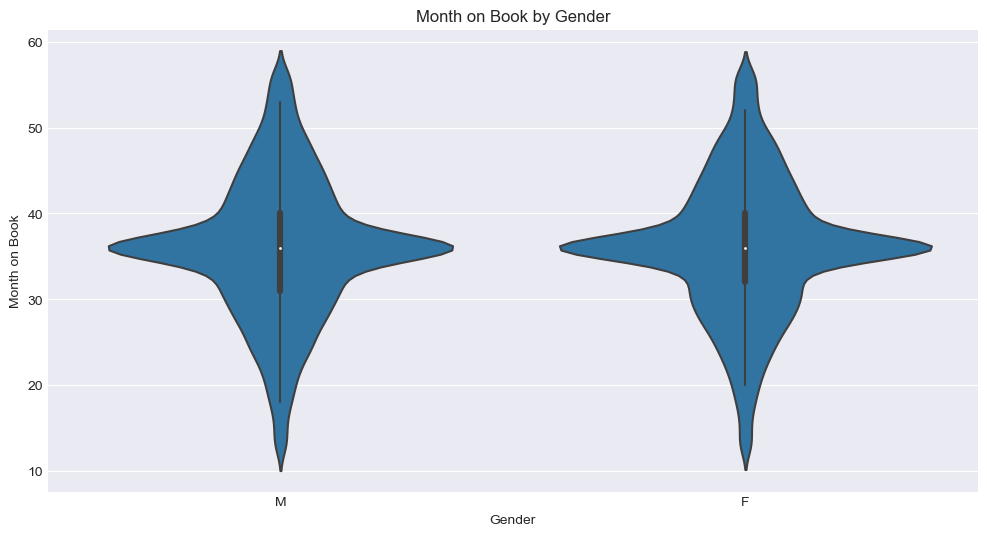

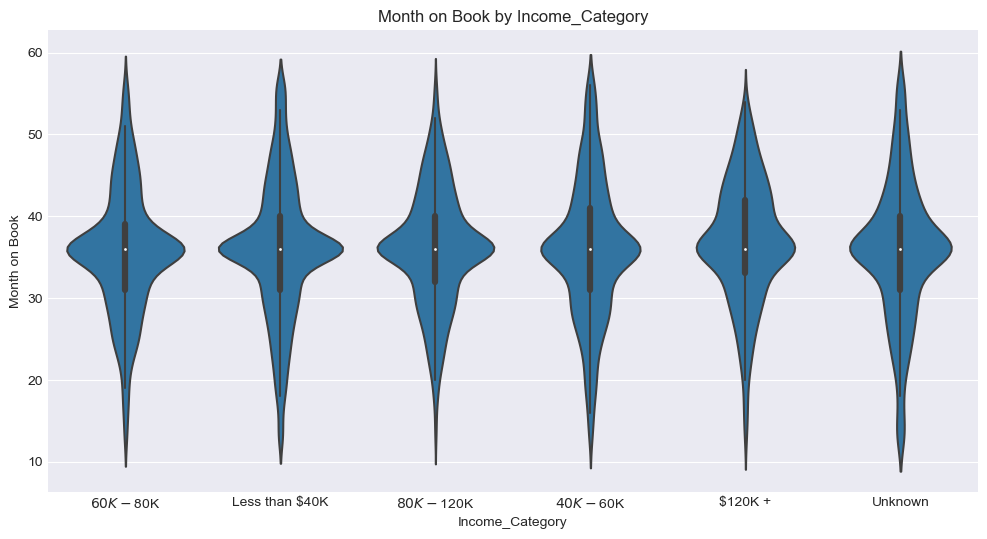

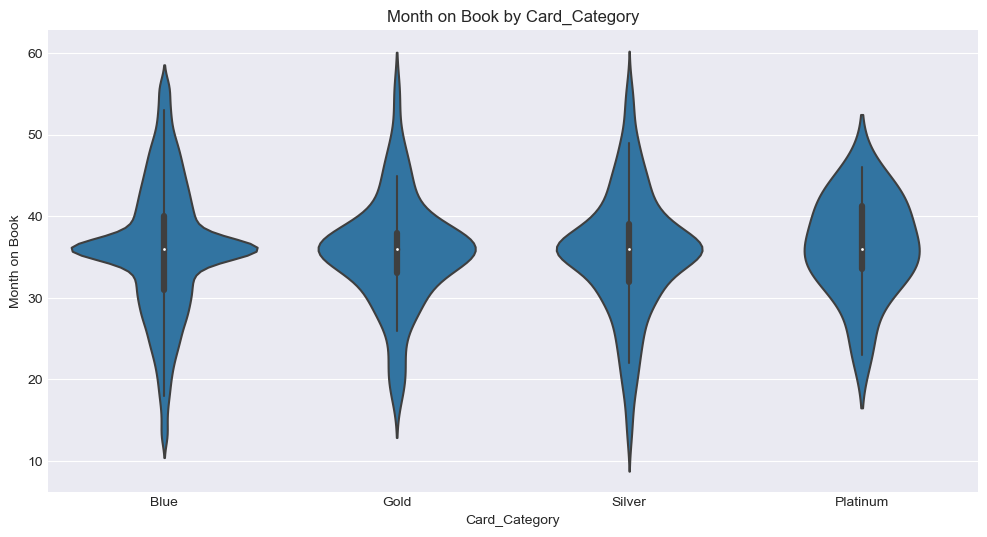

In [44]:
def violine(df, x):
    plt.figure(figsize= [12,6])
    color = sb.color_palette()[0]
    sb.violinplot(data= df1, y= 'Months_on_book', x= x, color= color)
    plt.title(f'Month on Book by {x}')
    plt.xlabel(x)
    plt.ylabel('Month on Book')
    
for i in demoColumns:
    violine(df1, i)  

<Figure size 2500x2000 with 0 Axes>

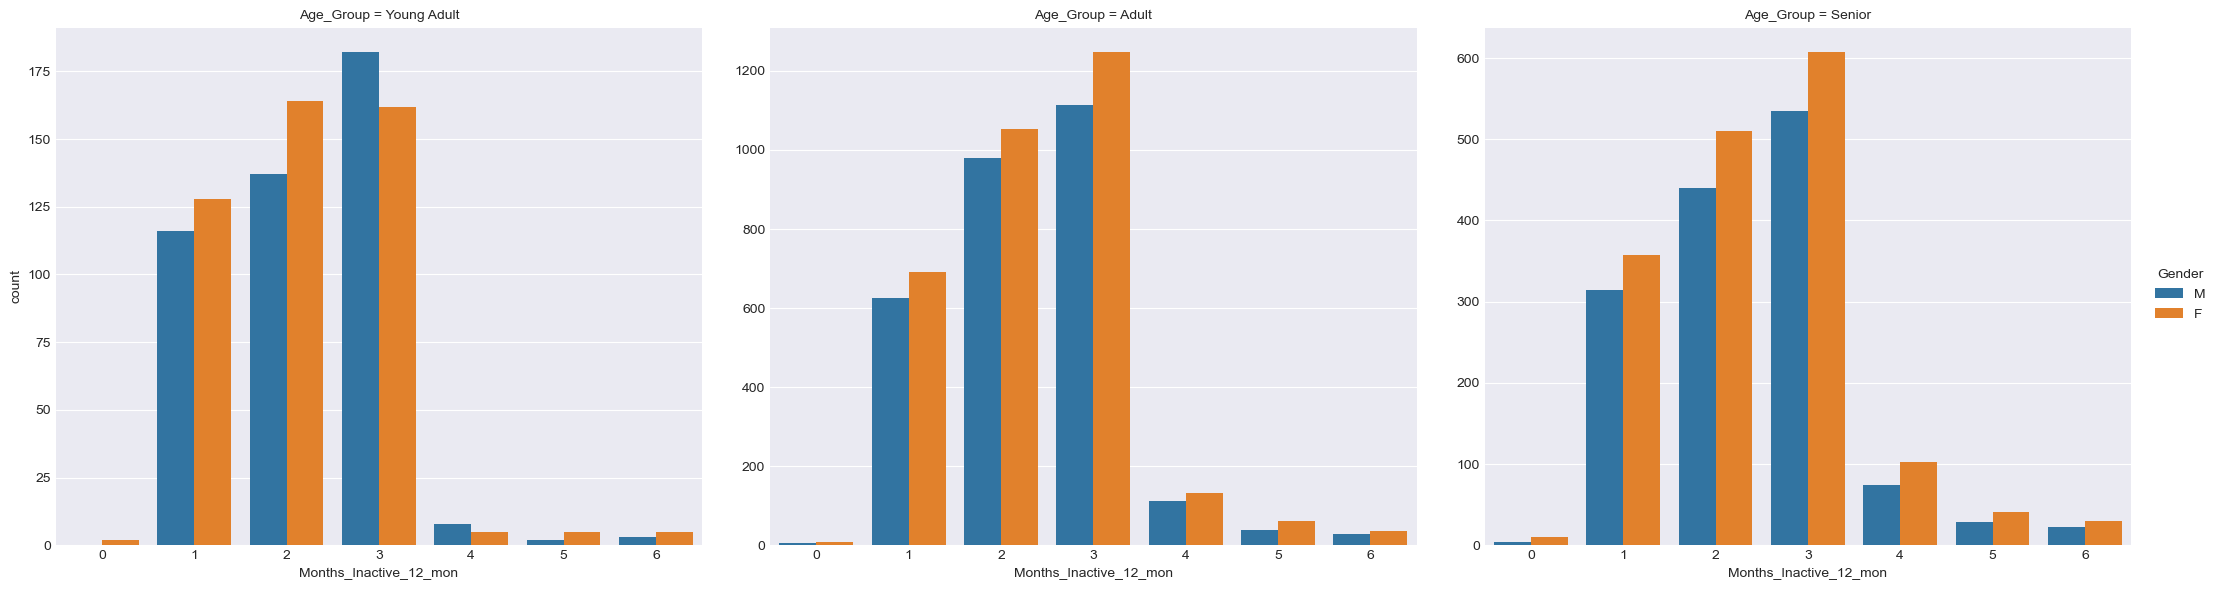

In [45]:
plt.figure(figsize=[25, 20], dpi= 100)
sb.catplot(x='Months_Inactive_12_mon', hue='Gender', col='Age_Group', kind='count', data=df1, col_wrap=3, height=6,
           aspect=1.2, sharey=False, sharex= False);
#plt.suptitle('Count of Months Inactive by Age Group and Gender', fontsize=18)
plt.show();

<Figure size 2500x2000 with 0 Axes>

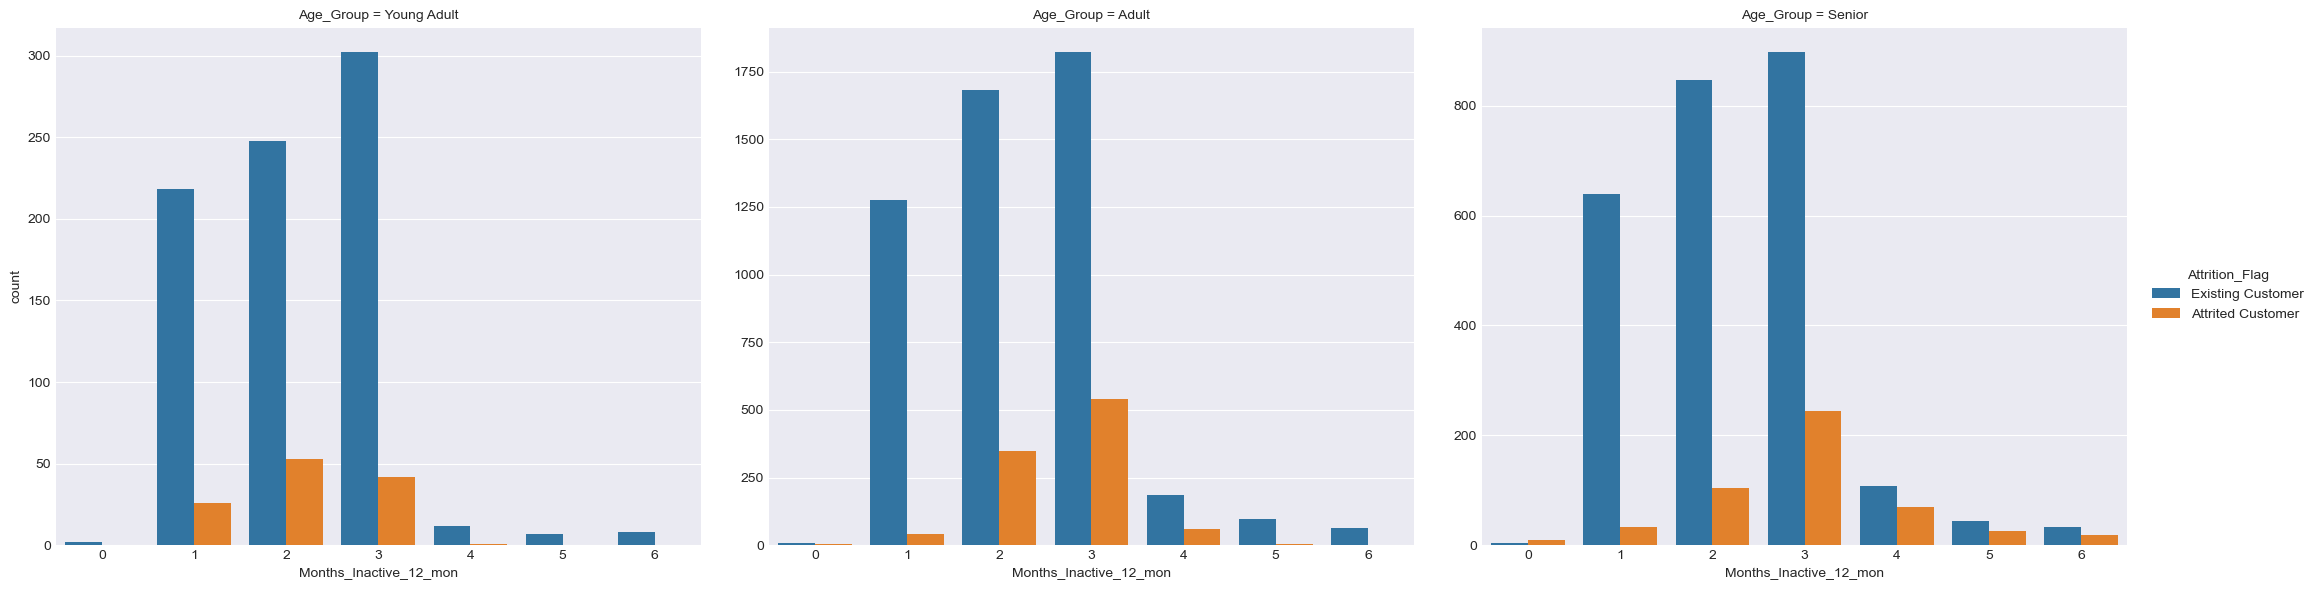

In [46]:
plt.figure(figsize=[25, 20], dpi= 100)
sb.catplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', col='Age_Group', kind='count', data=df1, col_wrap=3, height=6,
           aspect=1.2, sharey=False, sharex= False);

In [47]:
number.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2'],
      dtype='object')

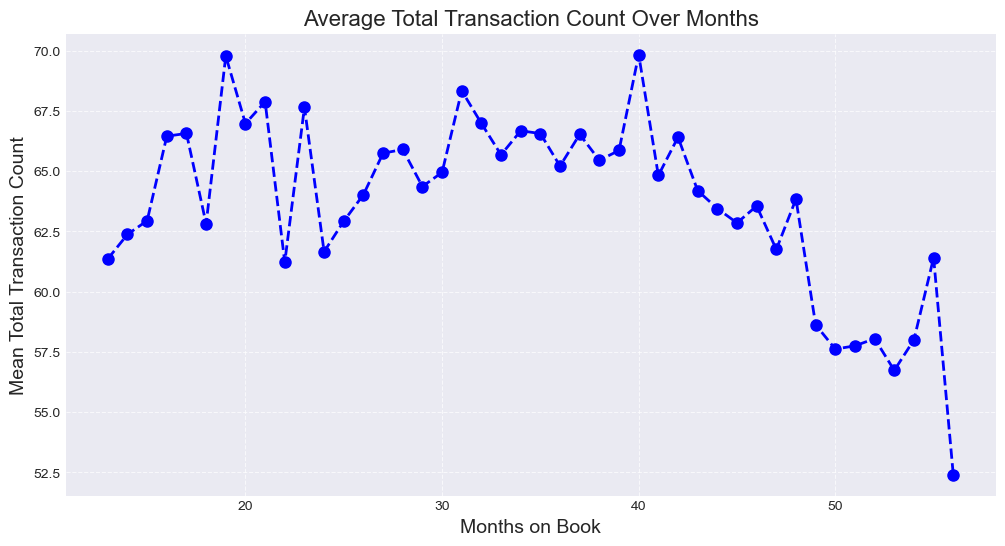

In [48]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Total_Trans_Ct'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Total Transaction Count Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total Transaction Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

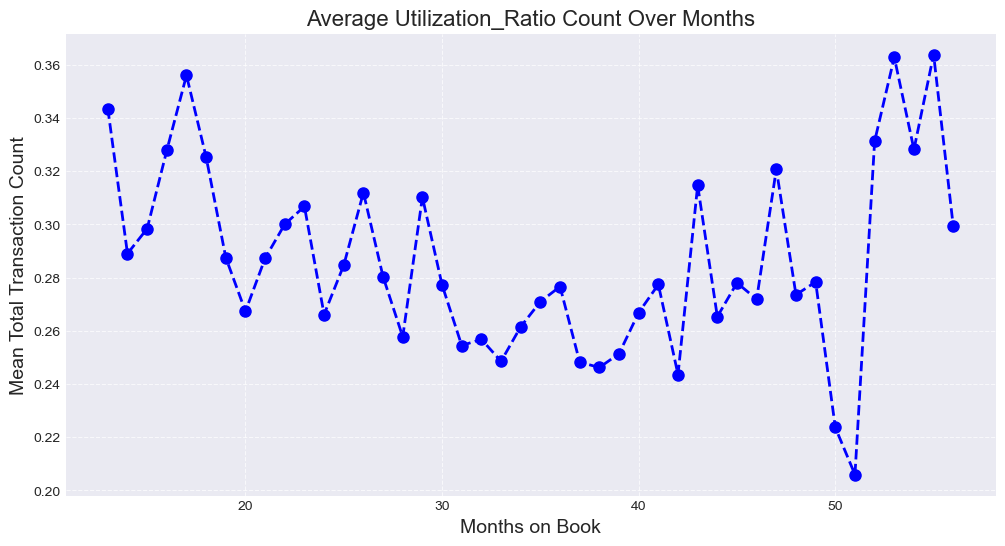

In [49]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Avg_Utilization_Ratio'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Utilization_Ratio Count Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total Transaction Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

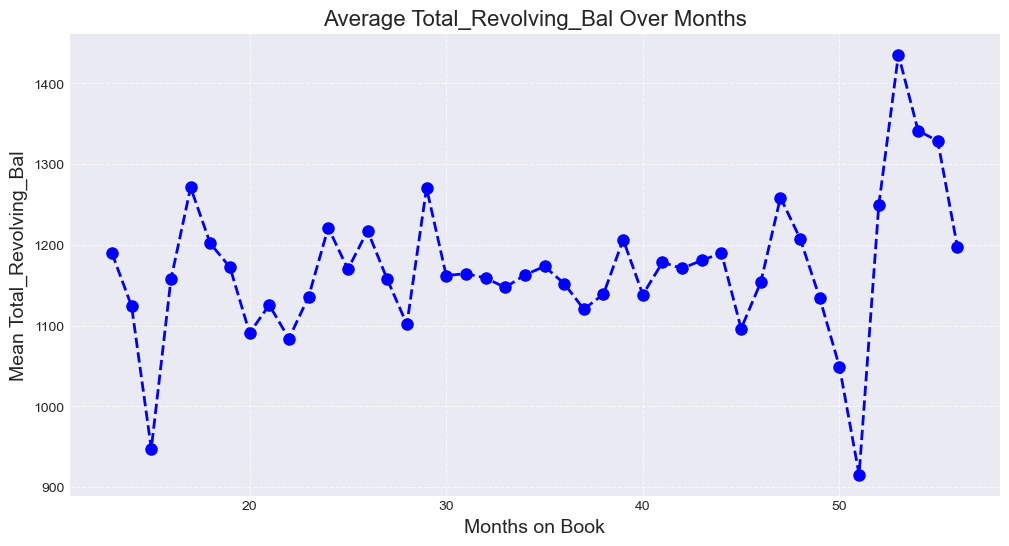

In [50]:
plt.figure(figsize= [12,6])
df1.groupby(df1['Months_on_book'])['Total_Revolving_Bal'].mean().plot(kind = 'line', color='blue',
                                    marker='o', linestyle='--', linewidth=2, markersize=8)
plt.title('Average Total_Revolving_Bal Over Months', fontsize=16)
plt.xlabel('Months on Book', fontsize=14)
plt.ylabel('Mean Total_Revolving_Bal', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

## Data Preprocessing

<Figure size 2500x2000 with 0 Axes>

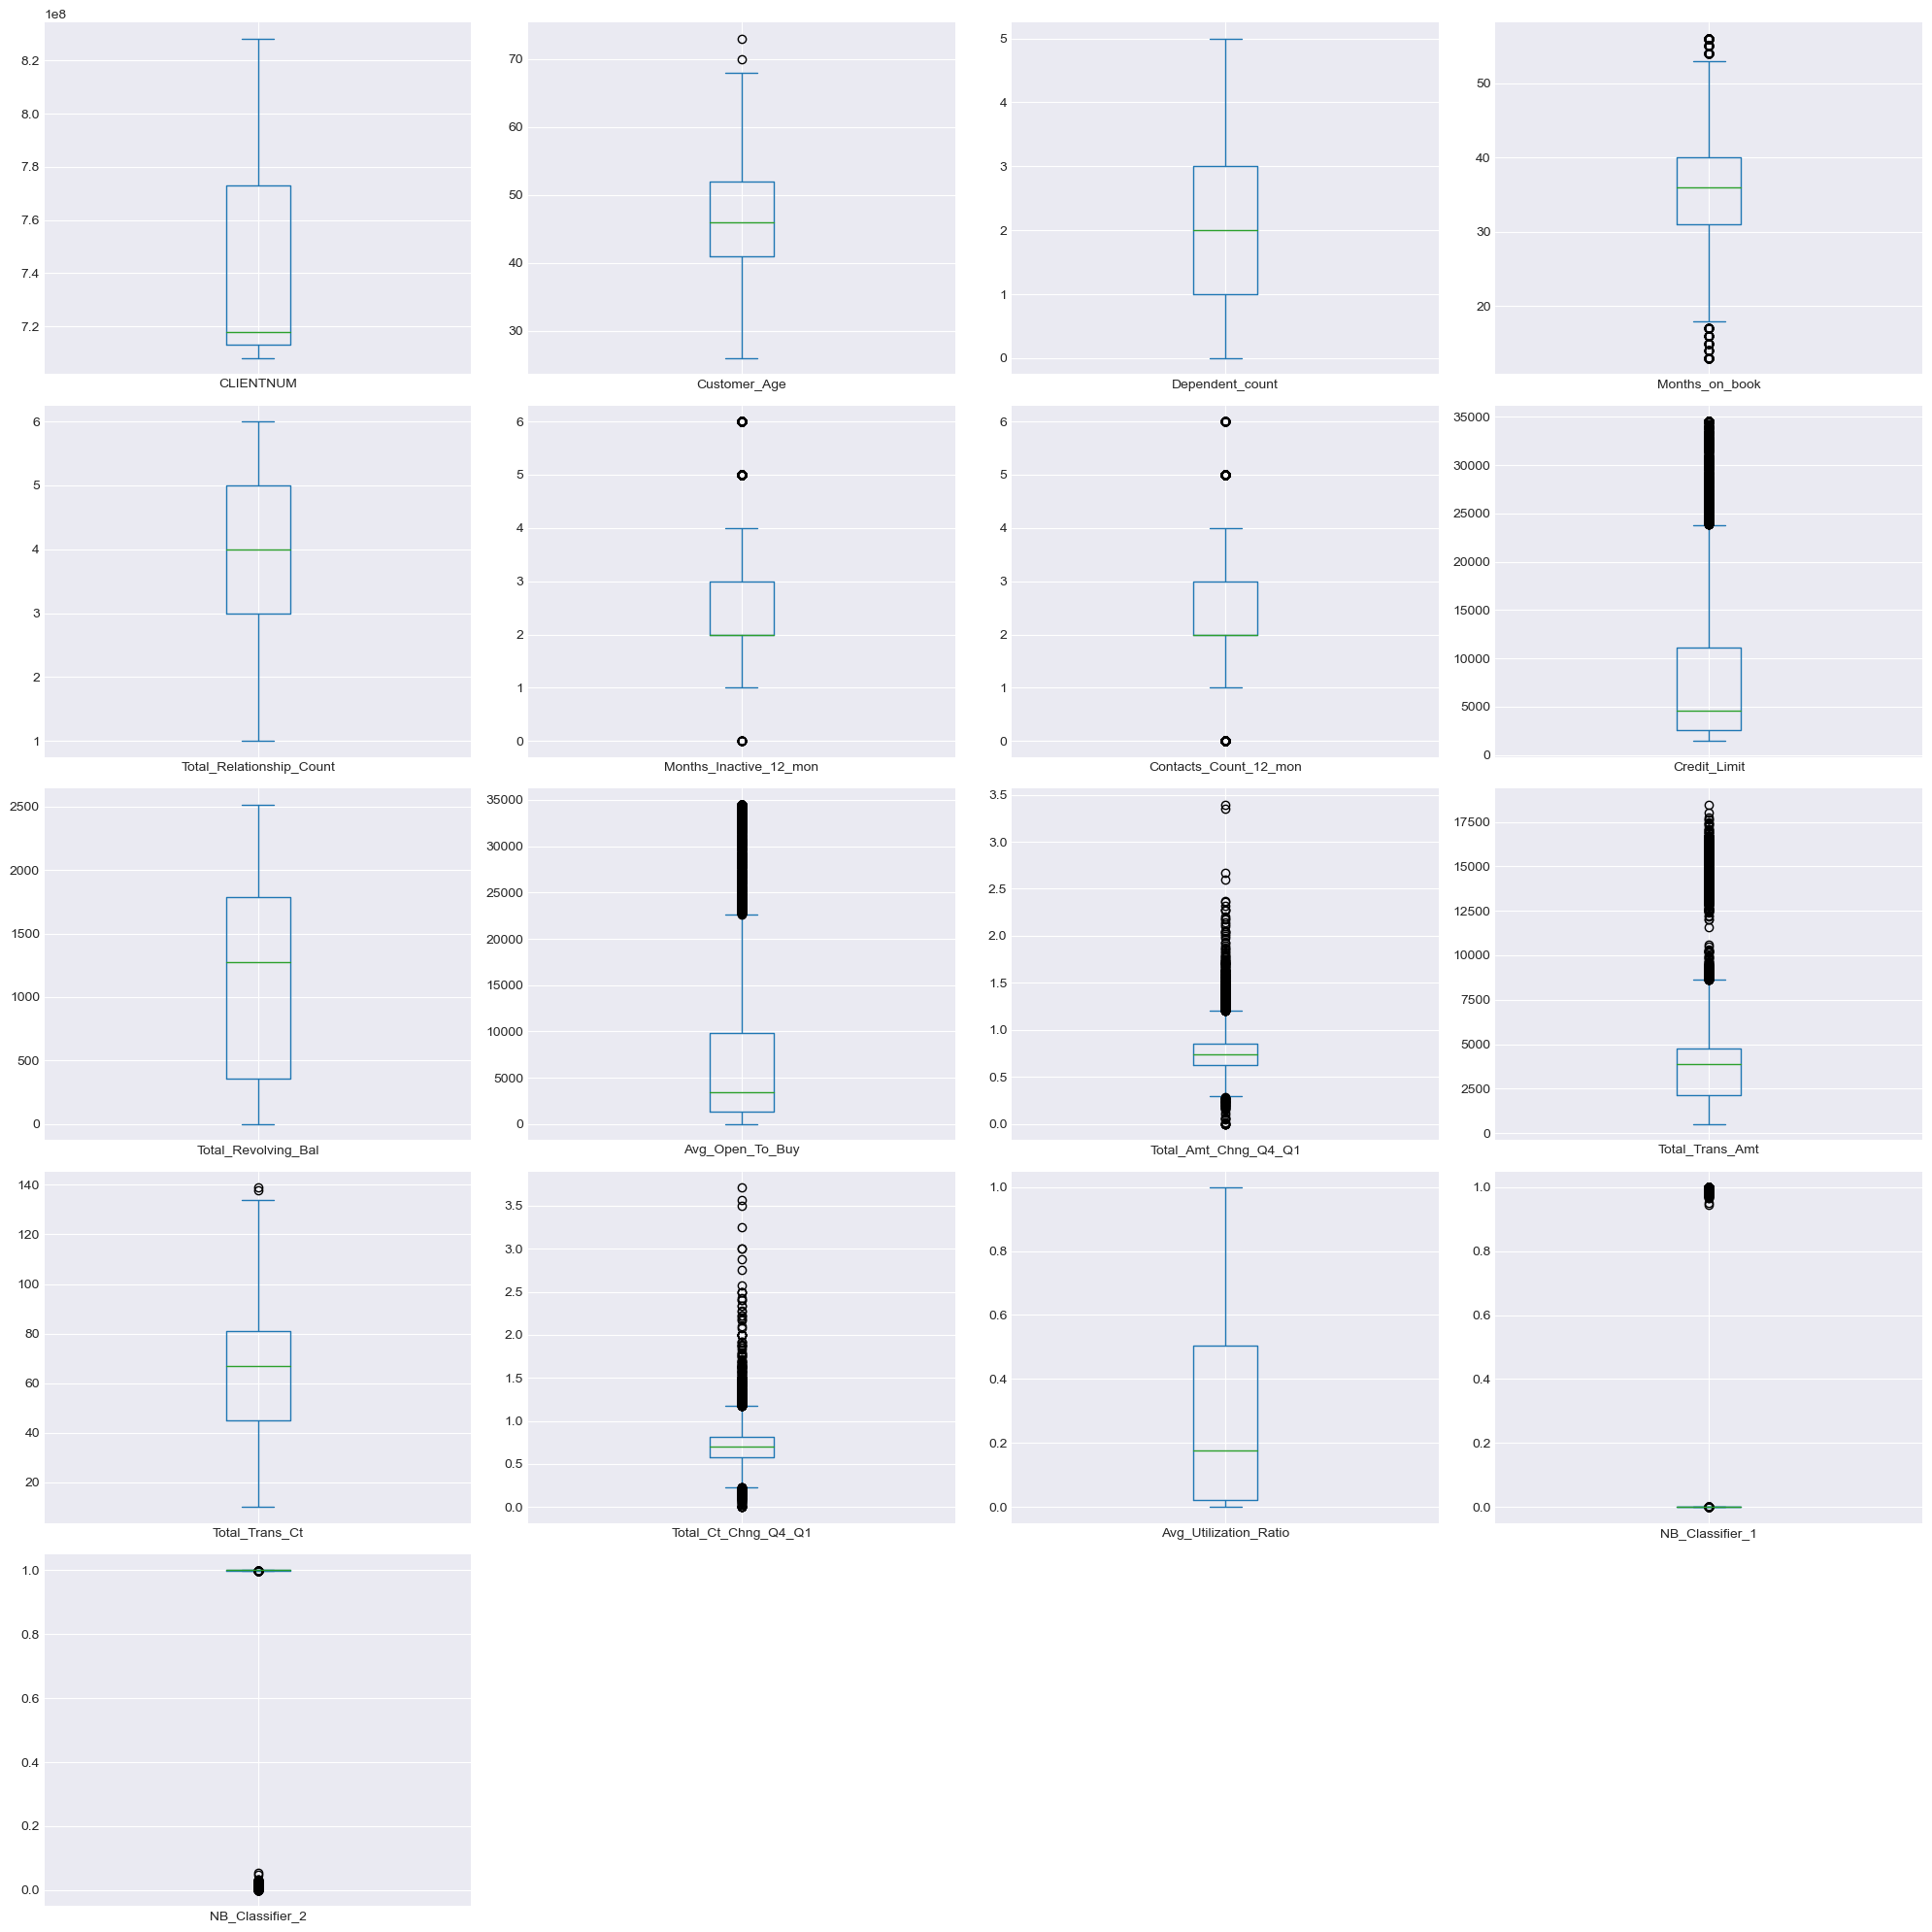

In [51]:
plt.figure(figsize=(25, 20), dpi=100)
df1.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

### Treating for Outliers

In [52]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [53]:
df1.shape

(10127, 24)

In [54]:
sample_outliers = detect_outliers_iqr(df1['Total_Trans_Amt'])
df1.drop(df1[df1['Total_Trans_Amt'].isin(sample_outliers)].index, inplace=True)

In [55]:
df1.shape

(9231, 24)

In [56]:
sample_outliers = detect_outliers_iqr(df1['Total_Amt_Chng_Q4_Q1'])
df1.drop(df1[df1['Total_Amt_Chng_Q4_Q1'].isin(sample_outliers)].index, inplace=True)

In [57]:
df1.shape

(8855, 24)

In [58]:
sample_outliers = detect_outliers_iqr(df1['Total_Ct_Chng_Q4_Q1'])
df1.drop(df1[df1['Total_Ct_Chng_Q4_Q1'].isin(sample_outliers)].index, inplace=True)

In [59]:
df1.shape

(8586, 24)

<Figure size 2500x2000 with 0 Axes>

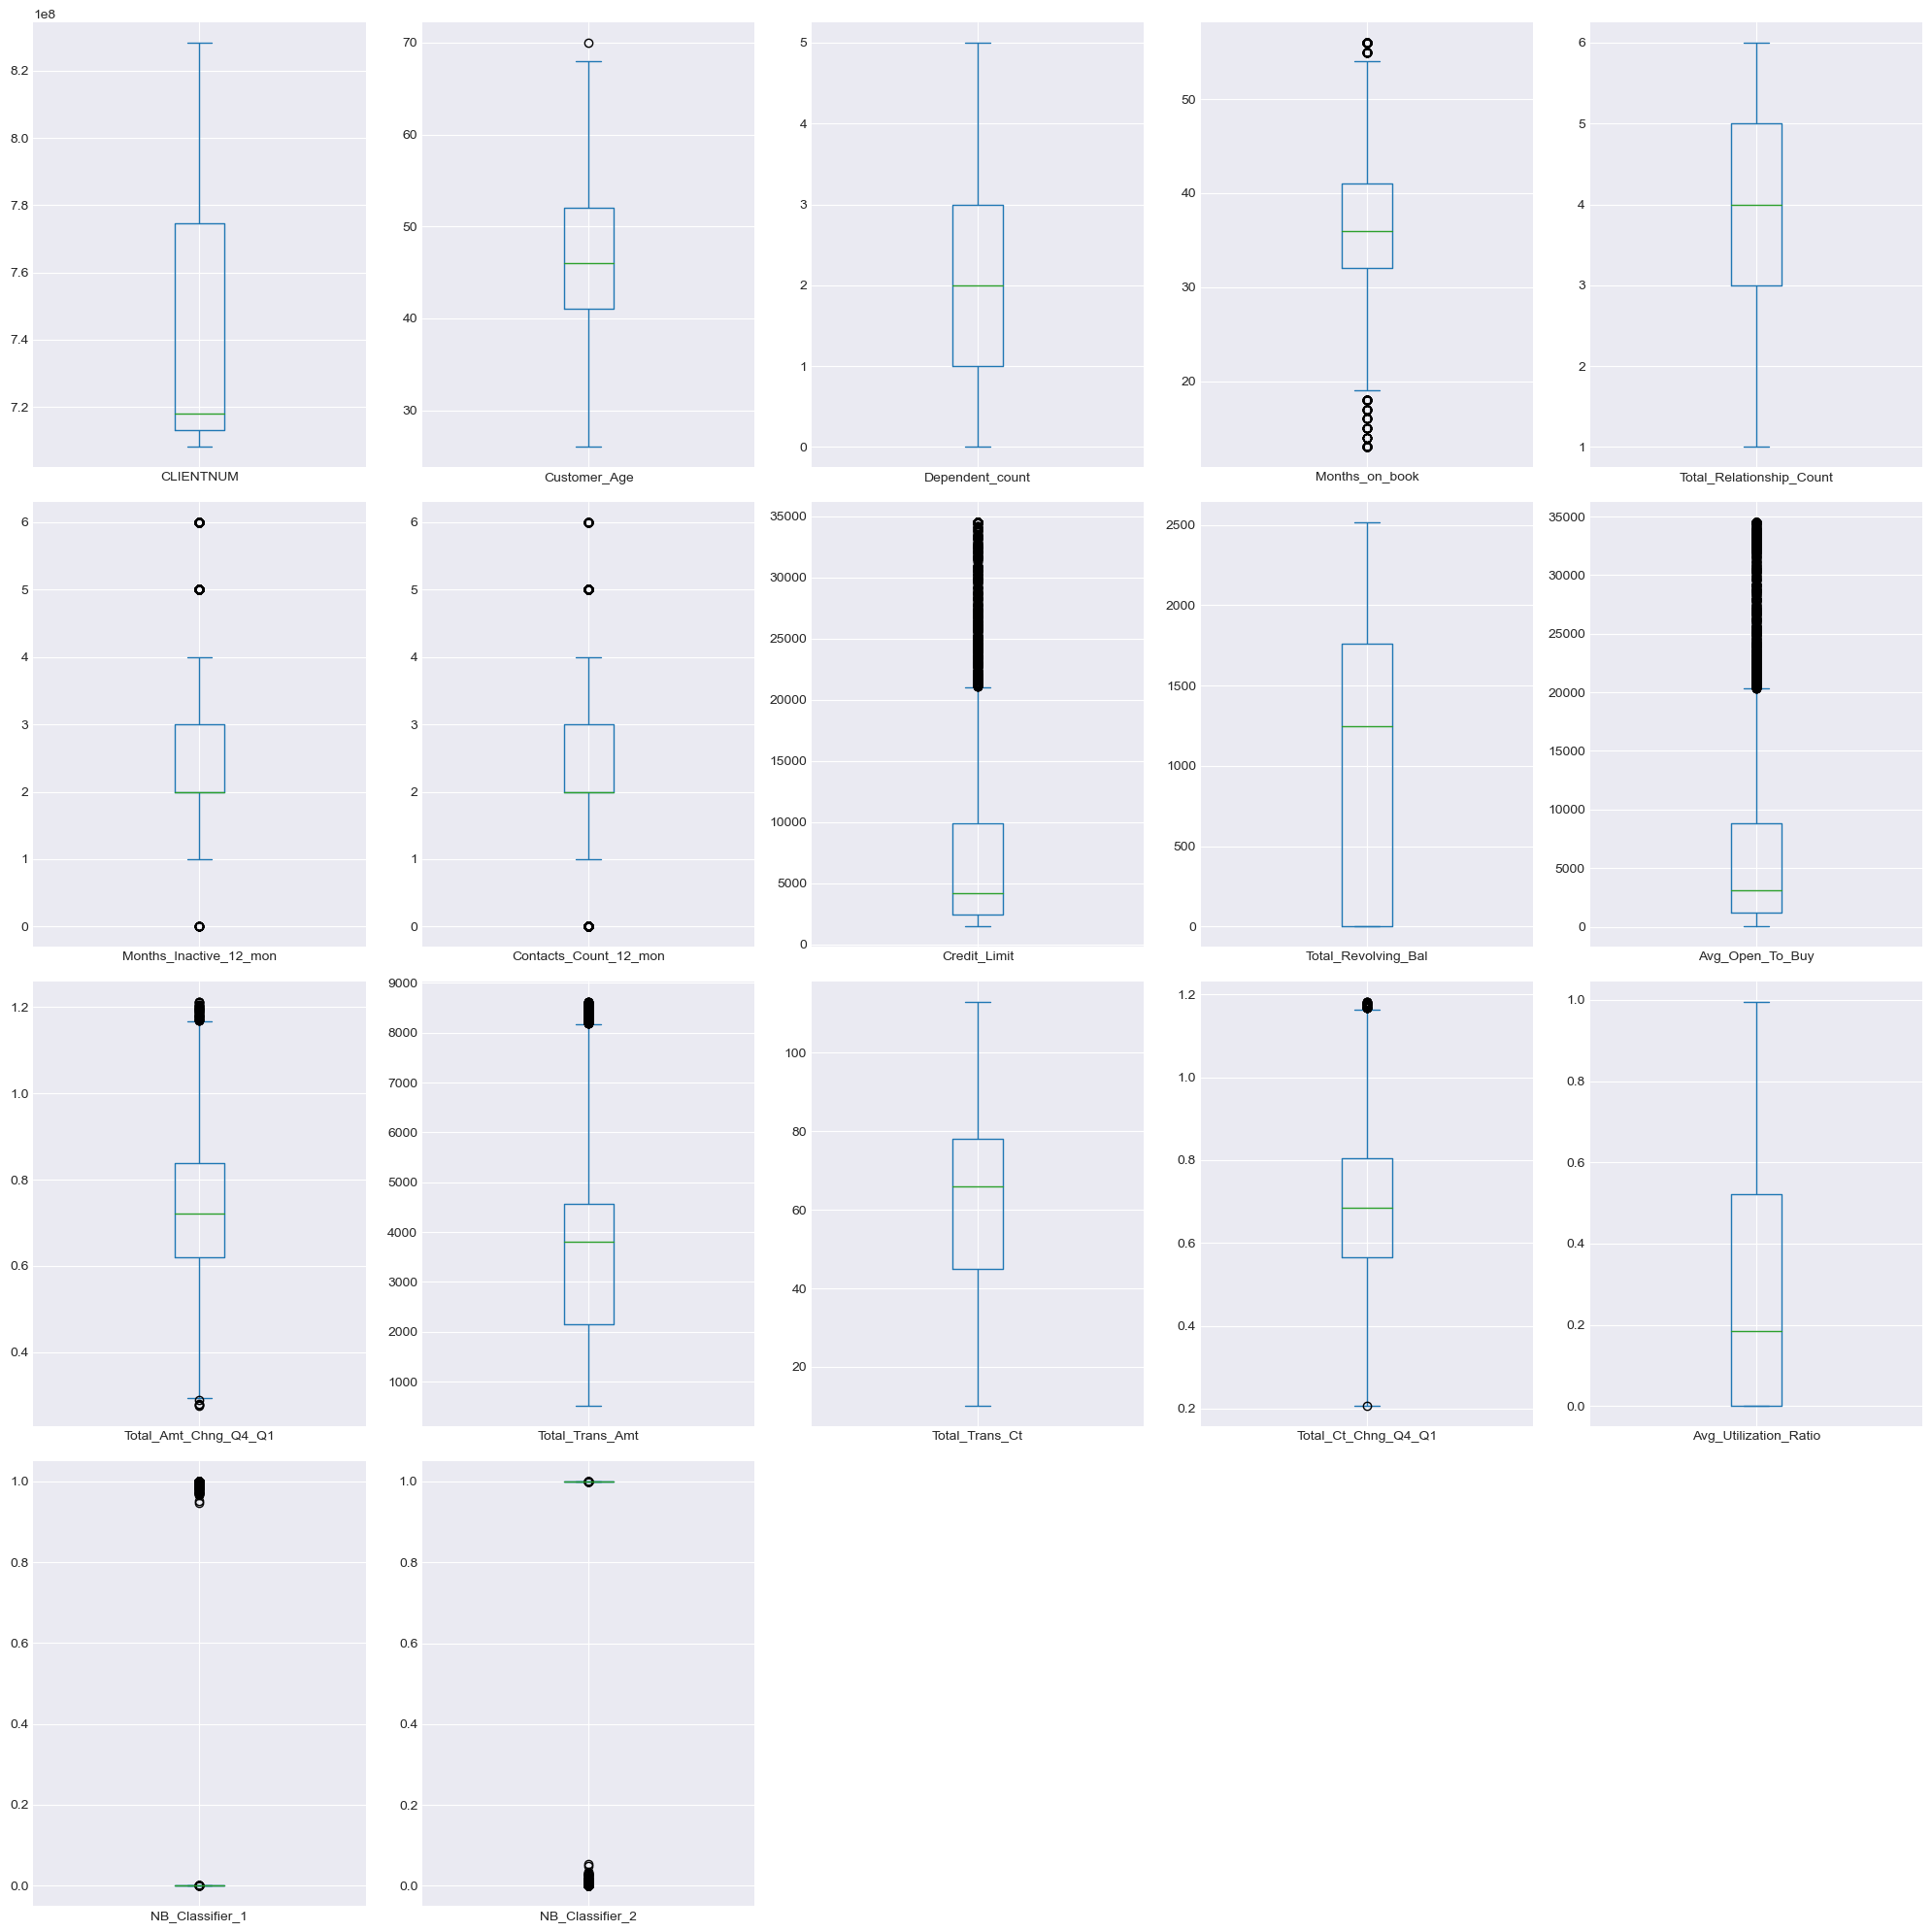

In [60]:
plt.figure(figsize=(25, 20), dpi=100)
df1.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show()

## Encoding

In [61]:
df1.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'Age_Group'],
      dtype='object')

In [62]:
cate = df1.select_dtypes('object')
cate

Attrition_Flag Gender Education_Level Marital_Status  \
10     Existing Customer      M      Uneducated        Unknown   
14     Existing Customer      F        Graduate        Married   
19     Existing Customer      F        Graduate        Married   
20     Existing Customer      M       Doctorate       Divorced   
21     Attrited Customer      F        Graduate        Married   
...                  ...    ...             ...            ...   
10054  Attrited Customer      F       Doctorate         Single   
10067  Attrited Customer      F      Uneducated        Married   
10089  Attrited Customer      F         Unknown        Married   
10103  Attrited Customer      M     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   

      Income_Category Card_Category  
10            $120K +          Blue  
14     Less than $40K          Blue  
19            Unknown          Blue  
20        $60K - $80K          Blue  
21     Less than $40K          Blue  
...               ...           ...  
10054  Less than $40K          Blue  
10067     $40K - $60K          Blue  
10089  Less than $40K          Blue  
10103    $80K - $120K          Blue  
10125     $40K - $60K          Blue  

[8586 rows x 6 columns]

In [63]:
for i in cate.columns:
    print(i, cate[i].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Gender ['M' 'F']
Education_Level ['Uneducated' 'Graduate' 'Doctorate' 'Unknown' 'High School' 'College'
 'Post-Graduate']
Marital_Status ['Unknown' 'Married' 'Divorced' 'Single']
Income_Category ['$120K +' 'Less than $40K' 'Unknown' '$60K - $80K' '$80K - $120K'
 '$40K - $60K']
Card_Category ['Blue' 'Silver' 'Gold' 'Platinum']


In [64]:
df1['Age_Group'].unique()

['Adult', 'Senior', 'Young Adult']
Categories (3, object): ['Young Adult' < 'Adult' < 'Senior']

In [65]:
cate.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [66]:
df1['Education_Level'].unique()

array(['Uneducated', 'Graduate', 'Doctorate', 'Unknown', 'High School',
       'College', 'Post-Graduate'], dtype=object)

In [67]:
df1['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [68]:
df1.groupby('Attrition_Flag').size()

Attrition_Flag
Attrited Customer    1438
Existing Customer    7148
dtype: int64

In [69]:
feature = [f for f in df1.columns if f != 'Attrition_Flag']
target =  [t for t in df1.columns if t == 'Attrition_Flag']

X = df1[feature]
y = df1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size= 0.20, random_state=42)

## ENCODING EDUCATION LEVEL

In [70]:
 # Define the order of categories
education_order = ['Unknown','Uneducated', 'College', 'Graduate', 'High School', 'Post-Graduate', 'Doctorate']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[education_order]).fit(X_train[['Education_Level']])

# Fit and transform on the training data
X_train['Education_Level'] = ordinal_encoder.transform(X_train[['Education_Level']])

# Transform the test data using the same encoder
X_test['Education_Level'] = ordinal_encoder.transform(X_test[['Education_Level']])


## ENCODING MARITAL STATUS

In [71]:
# Define the order of categories
marital_order = ['Unknown','Single', 'Married', 'Divorced']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[marital_order]).fit(X_train[['Marital_Status']])

# Fit and transform on the training data
X_train['Marital_Status'] = ordinal_encoder.transform(X_train[['Marital_Status']])

# Transform the test data using the same encoder
X_test['Marital_Status'] = ordinal_encoder.transform(X_test[['Marital_Status']])


## ENCODING INCOME CATEGORY

In [72]:
# Define the order of categories
income_order = ['Unknown','Less than $40K', '$40K - $60K', '$60K - $80K', 
       '$80K - $120K', '$120K +']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[income_order]).fit(X_train[['Income_Category']])

# Fit and transform on the training data
X_train['Income_Category'] = ordinal_encoder.transform(X_train[['Income_Category']])

# Transform the test data using the same encoder
X_test['Income_Category'] = ordinal_encoder.transform(X_test[['Income_Category']])

## ENCODING INCOME CATEGORY

In [73]:
# Define the order of categories
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[card_order]).fit(X_train[['Card_Category']])

# Fit and transform on the training data
X_train['Card_Category'] = ordinal_encoder.transform(X_train[['Card_Category']])

# Transform the test data using the same encoder
X_test['Card_Category'] = ordinal_encoder.transform(X_test[['Card_Category']])


## ENCODING INCOME AGE GROUP

In [74]:
# Define the order of categories
age_order = ['Adult', 'Senior', 'Young Adult']

# Initialize the OrdinalEncoder with the specified order
Age_ordinal_encoder = OrdinalEncoder(categories=[age_order]).fit(X_train[['Age_Group']])

# Fit and transform on the training data
X_train['Age_Group'] = Age_ordinal_encoder.transform(X_train[['Age_Group']])

# Transform the test data using the same encoder
X_test['Age_Group'] = Age_ordinal_encoder.transform(X_test[['Age_Group']])

## LABEL ENCODNG

In [75]:
# Initialize the Binarizer
binarizer = LabelBinarizer().fit(X_train['Gender'])
X_train['Gender']= binarizer.transform(X_train['Gender'])

X_test['Gender'] = binarizer.transform(X_test['Gender'])

In [76]:
y_train['Attrition_Flag'] = y_train['Attrition_Flag'].map(lambda x : 1 if x == 'Attrited Customer' else 0 )
y_test['Attrition_Flag'] = y_test['Attrition_Flag'].map(lambda x : 1 if x == 'Attrited Customer' else 0 )

In [77]:
y_test['Attrition_Flag'].unique()

array([0, 1], dtype=int64)

In [78]:
y_train['Attrition_Flag'].unique()

array([1, 0], dtype=int64)

In [79]:
 X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6868 entries, 5686 to 7893
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 6868 non-null   int64  
 1   Customer_Age              6868 non-null   int64  
 2   Gender                    6868 non-null   int32  
 3   Dependent_count           6868 non-null   int64  
 4   Education_Level           6868 non-null   float64
 5   Marital_Status            6868 non-null   float64
 6   Income_Category           6868 non-null   float64
 7   Card_Category             6868 non-null   float64
 8   Months_on_book            6868 non-null   int64  
 9   Total_Relationship_Count  6868 non-null   int64  
 10  Months_Inactive_12_mon    6868 non-null   int64  
 11  Contacts_Count_12_mon     6868 non-null   int64  
 12  Credit_Limit              6868 non-null   float64
 13  Total_Revolving_Bal       6868 non-null   int64  
 14  Avg_O

In [80]:
y_train['Attrition_Flag'].value_counts()

0    5717
1    1151
Name: Attrition_Flag, dtype: int64

In [81]:
random_seed = 24
np.random.seed(random_seed)

# Create SMOTE instance with random_state
oversample = SMOTE(random_state=random_seed)
#oversamling for train data
transformed_X_train, transformed_y_train = oversample.fit_resample(X_train, y_train)

#oversamling for test data
transformed_X_test, transformed_y_test = oversample.fit_resample(X_test, y_test)

In [82]:
transformed_y_train['Attrition_Flag'].value_counts()

1    5717
0    5717
Name: Attrition_Flag, dtype: int64

In [83]:
X_train = transformed_X_train.values
X_test = transformed_X_test.values
y_train = transformed_y_train.values
y_test = transformed_y_test.values




In [84]:
Xtrain_df = pd.DataFrame(X_train, columns = feature)
Xtrain_df.describe().T

count          mean           std           min  \
CLIENTNUM                 11434.0  7.383626e+08  3.685645e+07  7.080855e+08   
Customer_Age              11434.0  4.645723e+01  7.235233e+00  2.600000e+01   
Gender                    11434.0  3.375022e-01  4.728784e-01  0.000000e+00   
Dependent_count           11434.0  2.233164e+00  1.216536e+00  0.000000e+00   
Education_Level           11434.0  2.606805e+00  1.534540e+00  0.000000e+00   
Marital_Status            11434.0  1.522577e+00  6.849488e-01  0.000000e+00   
Income_Category           11434.0  2.023560e+00  1.366757e+00  0.000000e+00   
Card_Category             11434.0  6.868528e-02  2.832896e-01  0.000000e+00   
Months_on_book            11434.0  3.598303e+01  7.270382e+00  1.300000e+01   
Total_Relationship_Count  11434.0  3.510233e+00  1.508346e+00  1.000000e+00   
Months_Inactive_12_mon    11434.0  2.387878e+00  9.179951e-01  0.000000e+00   
Contacts_Count_12_mon     11434.0  2.501837e+00  1.027670e+00  0.000000e+00   
Credit_Limit              11434.0  7.721587e+03  8.069877e+03  1.438300e+03   
Total_Revolving_Bal       11434.0  9.438087e+02  8.207268e+02  0.000000e+00   
Avg_Open_To_Buy           11434.0  6.777642e+03  8.058404e+03  1.000000e+01   
Total_Amt_Chng_Q4_Q1      11434.0  7.164985e-01  1.641417e-01  2.750000e-01   
Total_Trans_Amt           11434.0  3.254625e+03  1.628330e+03  5.100000e+02   
Total_Trans_Ct            11434.0  5.487406e+01  1.884573e+01  1.000000e+01   
Total_Ct_Chng_Q4_Q1       11434.0  6.335924e-01  1.820014e-01  2.060000e-01   
Avg_Utilization_Ratio     11434.0  2.366978e-01  2.649819e-01  0.000000e+00   
NB_Classifier_1           11434.0  4.975226e-01  4.973618e-01  7.664200e-06   
NB_Classifier_2           11434.0  5.024774e-01  4.973618e-01  4.199800e-04   
Age_Group                 11434.0  4.605154e-01  5.921673e-01  0.000000e+00   

                                   25%           50%           75%  \
CLIENTNUM                 7.127219e+08  7.174920e+08  7.724248e+08   
Customer_Age              4.200000e+01  4.600000e+01  5.100000e+01   
Gender                    0.000000e+00  0.000000e+00  1.000000e+00   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Education_Level           1.203942e+00  3.000000e+00  3.897755e+00   
Marital_Status            1.000000e+00  1.644554e+00  2.000000e+00   
Income_Category           1.000000e+00  1.914495e+00  3.000000e+00   
Card_Category             0.000000e+00  0.000000e+00  0.000000e+00   
Months_on_book            3.200000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  2.000000e+00  3.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  3.000000e+00  3.000000e+00   
Credit_Limit              2.503000e+03  4.376500e+03  9.440467e+03   
Total_Revolving_Bal       0.000000e+00  9.130000e+02  1.616000e+03   
Avg_Open_To_Buy           1.484000e+03  3.475493e+03  8.536953e+03   
Total_Amt_Chng_Q4_Q1      6.040000e-01  7.113370e-01  8.269639e-01   
Total_Trans_Amt           2.062000e+03  2.666000e+03  4.345750e+03   
Total_Trans_Ct            4.000000e+01  5.000000e+01  7.100000e+01   
Total_Ct_Chng_Q4_Q1       5.000000e-01  6.280000e-01  7.550000e-01   
Avg_Utilization_Ratio     0.000000e+00  1.270636e-01  4.205118e-01   
NB_Classifier_1           1.597100e-04  4.736006e-01  9.957026e-01   
NB_Classifier_2           4.297976e-03  5.264000e-01  9.998400e-01   
Age_Group                 0.000000e+00  0.000000e+00  1.000000e+00   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              6.800000e+01  
Gender                    1.000000e+00  
Dependent_count           5.000000e+00  
Education_Level           6.000000e+00  
Marital_Status            3.000000e+00  
Income_Category           5.000000e+00  
Card_Category             3.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  

In [85]:
#Rescaling
scaler = MinMaxScaler(feature_range = (0,1)).fit(X_train)
R_Xtrain = scaler.transform(X_train)
R_Xtest = scaler.transform(X_test)

In [86]:
R_Xtrain_df = pd.DataFrame(R_Xtrain, columns = feature)
R_Xtrain_df.describe().T

count      mean       std  min       25%  \
CLIENTNUM                 11434.0  0.251769  0.306479  0.0  0.038554   
Customer_Age              11434.0  0.487077  0.172267  0.0  0.380952   
Gender                    11434.0  0.337502  0.472878  0.0  0.000000   
Dependent_count           11434.0  0.446633  0.243307  0.0  0.200000   
Education_Level           11434.0  0.434468  0.255757  0.0  0.200657   
Marital_Status            11434.0  0.507526  0.228316  0.0  0.333333   
Income_Category           11434.0  0.404712  0.273351  0.0  0.200000   
Card_Category             11434.0  0.022895  0.094430  0.0  0.000000   
Months_on_book            11434.0  0.534489  0.169079  0.0  0.441860   
Total_Relationship_Count  11434.0  0.502047  0.301669  0.0  0.200000   
Months_Inactive_12_mon    11434.0  0.397980  0.152999  0.0  0.333333   
Contacts_Count_12_mon     11434.0  0.416973  0.171278  0.0  0.333333   
Credit_Limit              11434.0  0.189955  0.243967  0.0  0.032188   
Total_Revolving_Bal       11434.0  0.374974  0.326073  0.0  0.000000   
Avg_Open_To_Buy           11434.0  0.196129  0.233536  0.0  0.042717   
Total_Amt_Chng_Q4_Q1      11434.0  0.471183  0.175178  0.0  0.351121   
Total_Trans_Amt           11434.0  0.338508  0.200830  0.0  0.191416   
Total_Trans_Ct            11434.0  0.435670  0.182968  0.0  0.291262   
Total_Ct_Chng_Q4_Q1       11434.0  0.438107  0.186477  0.0  0.301230   
Avg_Utilization_Ratio     11434.0  0.237887  0.266313  0.0  0.000000   
NB_Classifier_1           11434.0  0.497728  0.497575  0.0  0.000152   
NB_Classifier_2           11434.0  0.502273  0.497576  0.0  0.003880   
Age_Group                 11434.0  0.230258  0.296084  0.0  0.000000   

                               50%       75%  max  
CLIENTNUM                 0.078220  0.535012  1.0  
Customer_Age              0.476190  0.595238  1.0  
Gender                    0.000000  1.000000  1.0  
Dependent_count           0.400000  0.600000  1.0  
Education_Level           0.500000  0.649626  1.0  
Marital_Status            0.548185  0.666667  1.0  
Income_Category           0.382899  0.600000  1.0  
Card_Category             0.000000  0.000000  1.0  
Months_on_book            0.534884  0.627907  1.0  
Total_Relationship_Count  0.400000  0.800000  1.0  
Months_Inactive_12_mon    0.333333  0.500000  1.0  
Contacts_Count_12_mon     0.500000  0.500000  1.0  
Credit_Limit              0.088827  0.241920  1.0  
Total_Revolving_Bal       0.362733  0.642034  1.0  
Avg_Open_To_Buy           0.100432  0.247115  1.0  
Total_Amt_Chng_Q4_Q1      0.465674  0.589076  1.0  
Total_Trans_Amt           0.265910  0.473082  1.0  
Total_Trans_Ct            0.388350  0.592233  1.0  
Total_Ct_Chng_Q4_Q1       0.432377  0.562500  1.0  
Avg_Utilization_Ratio     0.127702  0.422625  1.0  
NB_Classifier_1           0.473796  0.996121  1.0  
NB_Classifier_2           0.526206  0.999850  1.0  
Age_Group                 0.000000  0.500000  1.0

<Figure size 2500x2000 with 0 Axes>

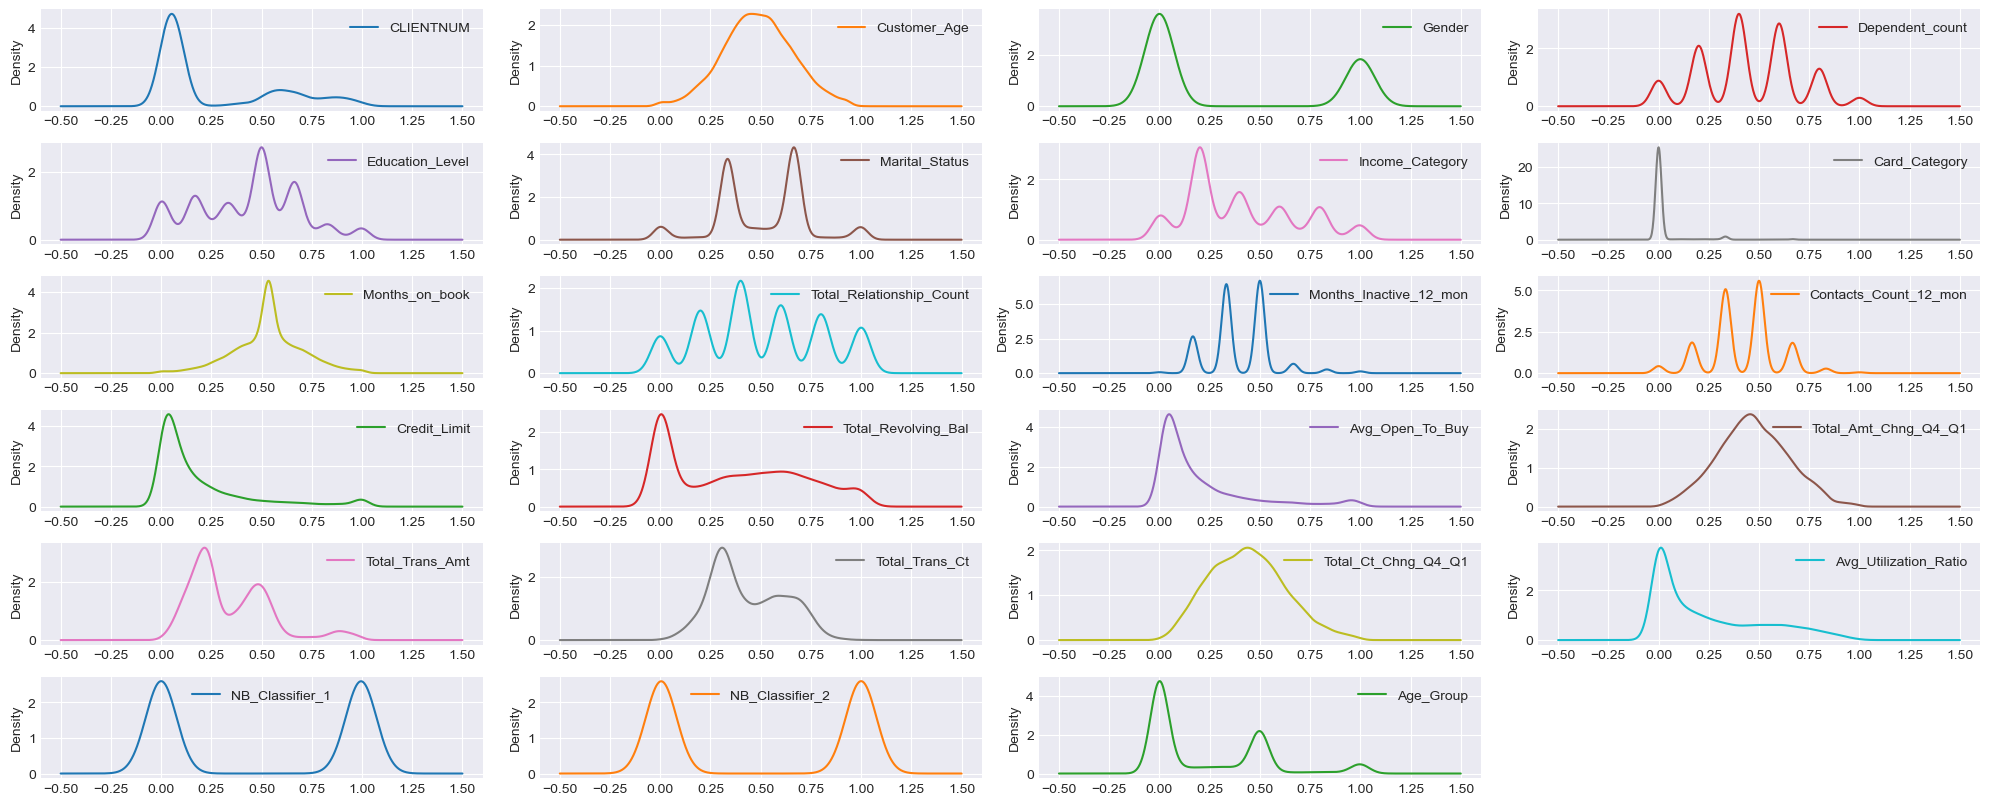

In [87]:
plt.figure(figsize=(25, 20), dpi= 100)
R_Xtrain_df.plot(kind='density', subplots=True, layout=(15,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

In [88]:
#Normalizer
normalizer = Normalizer().fit(R_Xtrain)
NR_Xtrain = scaler.transform(R_Xtrain)
NR_Xtest = scaler.transform(R_Xtest)

In [89]:
NR_Xtrain_df = pd.DataFrame(NR_Xtrain, columns = feature)
NR_Xtrain_df.describe().T

count      mean           std       min       25%  \
CLIENTNUM                 11434.0 -5.888071  2.548522e-09 -5.888071 -5.888071   
Customer_Age              11434.0 -0.607451  4.101606e-03 -0.619048 -0.609977   
Gender                    11434.0  0.337502  4.728784e-01  0.000000  0.000000   
Dependent_count           11434.0  0.089327  4.866144e-02  0.000000  0.040000   
Education_Level           11434.0  0.072411  4.262612e-02  0.000000  0.033443   
Marital_Status            11434.0  0.169175  7.610542e-02  0.000000  0.111111   
Income_Category           11434.0  0.080942  5.467029e-02  0.000000  0.040000   
Card_Category             11434.0  0.007632  3.147663e-02  0.000000  0.000000   
Months_on_book            11434.0 -0.289896  3.932062e-03 -0.302326 -0.292050   
Total_Relationship_Count  11434.0 -0.099591  6.033384e-02 -0.200000 -0.160000   
Months_Inactive_12_mon    11434.0  0.066330  2.549986e-02  0.000000  0.055556   
Contacts_Count_12_mon     11434.0  0.069495  2.854640e-02  0.000000  0.055556   
Credit_Limit              11434.0 -0.043477  7.375583e-06 -0.043482 -0.043481   
Total_Revolving_Bal       11434.0  0.000149  1.295484e-04  0.000000  0.000000   
Avg_Open_To_Buy           11434.0 -0.000284  6.767991e-06 -0.000290 -0.000289   
Total_Amt_Chng_Q4_Q1      11434.0  0.209374  1.869561e-01 -0.293490  0.081239   
Total_Trans_Amt           11434.0 -0.062859  2.476937e-05 -0.062901 -0.062877   
Total_Trans_Ct            11434.0 -0.092858  1.776391e-03 -0.097087 -0.094260   
Total_Ct_Chng_Q4_Q1       11434.0  0.237814  1.910623e-01 -0.211066  0.097571   
Avg_Utilization_Ratio     11434.0  0.239083  2.676517e-01  0.000000  0.000000   
NB_Classifier_1           11434.0  0.497933  4.977875e-01 -0.000008  0.000145   
NB_Classifier_2           11434.0  0.502069  4.977898e-01 -0.000420  0.003461   
Age_Group                 11434.0  0.115129  1.480418e-01  0.000000  0.000000   

                               50%       75%           max  
CLIENTNUM                -5.888071 -5.888071 -5.888071e+00  
Customer_Age             -0.607710 -0.604875 -5.952381e-01  
Gender                    0.000000  1.000000  1.000000e+00  
Dependent_count           0.080000  0.120000  2.000000e-01  
Education_Level           0.083333  0.108271  1.666667e-01  
Marital_Status            0.182728  0.222222  3.333333e-01  
Income_Category           0.076580  0.120000  2.000000e-01  
Card_Category             0.000000  0.000000  3.333333e-01  
Months_on_book           -0.289886 -0.287723 -2.790698e-01  
Total_Relationship_Count -0.120000 -0.040000  5.551115e-17  
Months_Inactive_12_mon    0.055556  0.083333  1.666667e-01  
Contacts_Count_12_mon     0.083333  0.083333  1.666667e-01  
Credit_Limit             -0.043480 -0.043475 -4.345224e-02  
Total_Revolving_Bal       0.000144  0.000255  3.972984e-04  
Avg_Open_To_Buy          -0.000287 -0.000283 -2.608242e-04  
Total_Amt_Chng_Q4_Q1      0.203495  0.335193  7.737460e-01  
Total_Trans_Amt          -0.062868 -0.062842 -6.277750e-02  
Total_Trans_Ct           -0.093317 -0.091338 -8.737864e-02  
Total_Ct_Chng_Q4_Q1       0.231944  0.365266  8.135246e-01  
Avg_Utilization_Ratio     0.128344  0.424749  1.005025e+00  
NB_Classifier_1           0.473991  0.996539  1.000420e+00  
NB_Classifier_2           0.526012  0.999860  1.000010e+00  
Age_Group                 0.000000  0.250000  5.000000e-01

In [90]:
NR_Xtest_df = pd.DataFrame(NR_Xtest, columns = feature)
NR_Xtest_df.describe().T

count      mean           std       min       25%  \
CLIENTNUM                 2862.0 -5.888071  2.452402e-09 -5.888071 -5.888071   
Customer_Age              2862.0 -0.607406  4.254797e-03 -0.619048 -0.609977   
Gender                    2862.0  0.344864  4.754069e-01  0.000000  0.000000   
Dependent_count           2862.0  0.089182  4.721494e-02  0.000000  0.040000   
Education_Level           2862.0  0.071547  4.281916e-02  0.000000  0.028764   
Marital_Status            2862.0  0.168716  7.886363e-02  0.000000  0.111111   
Income_Category           2862.0  0.080388  5.481400e-02  0.000000  0.040000   
Card_Category             2862.0  0.007554  2.996614e-02  0.000000  0.000000   
Months_on_book            2862.0 -0.289872  4.117967e-03 -0.302326 -0.292050   
Total_Relationship_Count  2862.0 -0.097904  5.971218e-02 -0.200000 -0.160000   
Months_Inactive_12_mon    2862.0  0.064174  2.602057e-02  0.000000  0.055556   
Contacts_Count_12_mon     2862.0  0.072346  2.848370e-02  0.000000  0.055556   
Credit_Limit              2862.0 -0.043476  7.486811e-06 -0.043482 -0.043481   
Total_Revolving_Bal       2862.0  0.000152  1.332624e-04  0.000000  0.000000   
Avg_Open_To_Buy           2862.0 -0.000284  6.925251e-06 -0.000290 -0.000289   
Total_Amt_Chng_Q4_Q1      2862.0  0.209957  1.899717e-01 -0.288934  0.074405   
Total_Trans_Amt           2862.0 -0.062859  2.666532e-05 -0.062901 -0.062878   
Total_Trans_Ct            2862.0 -0.092882  1.845195e-03 -0.097087 -0.094354   
Total_Ct_Chng_Q4_Q1       2862.0  0.235655  1.916408e-01 -0.205817  0.088333   
Avg_Utilization_Ratio     2862.0  0.240131  2.716007e-01  0.000000  0.000000   
NB_Classifier_1           2862.0  0.498025  4.979545e-01  0.000003  0.000143   
NB_Classifier_2           2862.0  0.501977  4.979569e-01 -0.000420  0.003145   
Age_Group                 2862.0  0.116375  1.485219e-01  0.000000  0.000000   

                               50%       75%           max  
CLIENTNUM                -5.888071 -5.888071 -5.888071e+00  
Customer_Age             -0.607143 -0.604308 -5.941043e-01  
Gender                    0.000000  1.000000  1.000000e+00  
Dependent_count           0.080000  0.120000  2.000000e-01  
Education_Level           0.083333  0.106542  1.666667e-01  
Marital_Status            0.177647  0.222222  3.333333e-01  
Income_Category           0.077877  0.120000  2.000000e-01  
Card_Category             0.000000  0.000000  3.333333e-01  
Months_on_book           -0.289886 -0.287723 -2.790698e-01  
Total_Relationship_Count -0.080000 -0.040000  5.551115e-17  
Months_Inactive_12_mon    0.055556  0.083333  1.666667e-01  
Contacts_Count_12_mon     0.083333  0.083333  1.666667e-01  
Credit_Limit             -0.043479 -0.043474 -4.345224e-02  
Total_Revolving_Bal       0.000150  0.000261  3.972984e-04  
Avg_Open_To_Buy          -0.000287 -0.000282 -2.608242e-04  
Total_Amt_Chng_Q4_Q1      0.207906  0.341481  7.703290e-01  
Total_Trans_Amt          -0.062868 -0.062841 -6.277767e-02  
Total_Trans_Ct           -0.093317 -0.091338 -8.775568e-02  
Total_Ct_Chng_Q4_Q1       0.226674  0.365266  8.135246e-01  
Avg_Utilization_Ratio     0.124283  0.427262  1.004015e+00  
NB_Classifier_1           0.484107  0.996857  1.000420e+00  
NB_Classifier_2           0.515894  0.999860  1.000000e+00  
Age_Group                 0.000000  0.250000  5.000000e-01

<Figure size 2500x2000 with 0 Axes>

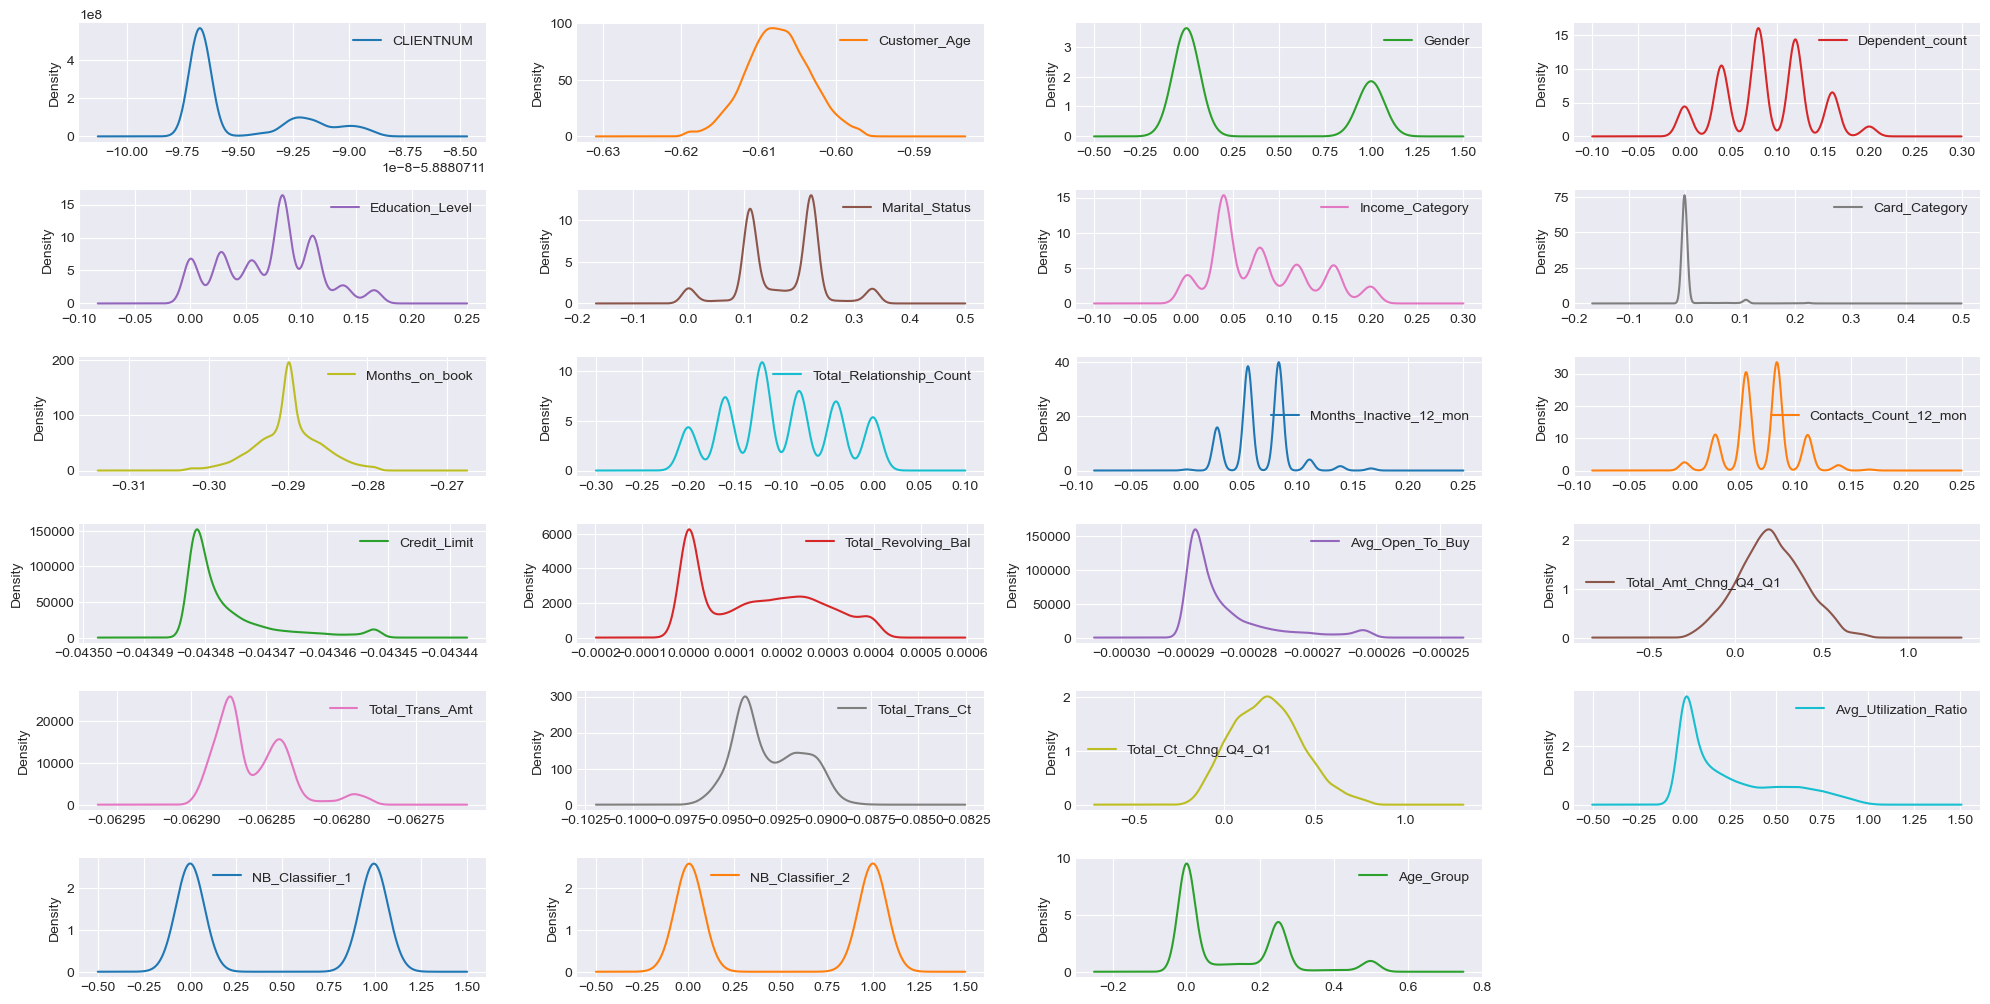

In [91]:
plt.figure(figsize=(25, 20), dpi= 100)
NR_Xtrain_df.plot(kind='density', subplots=True, layout=(12,4), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.tight_layout()
plt.show();

## Features Selection

### Multicolinearity

In [92]:
NR_Xtrain_df['Attrition_Flag'] = y_train

<Axes: >

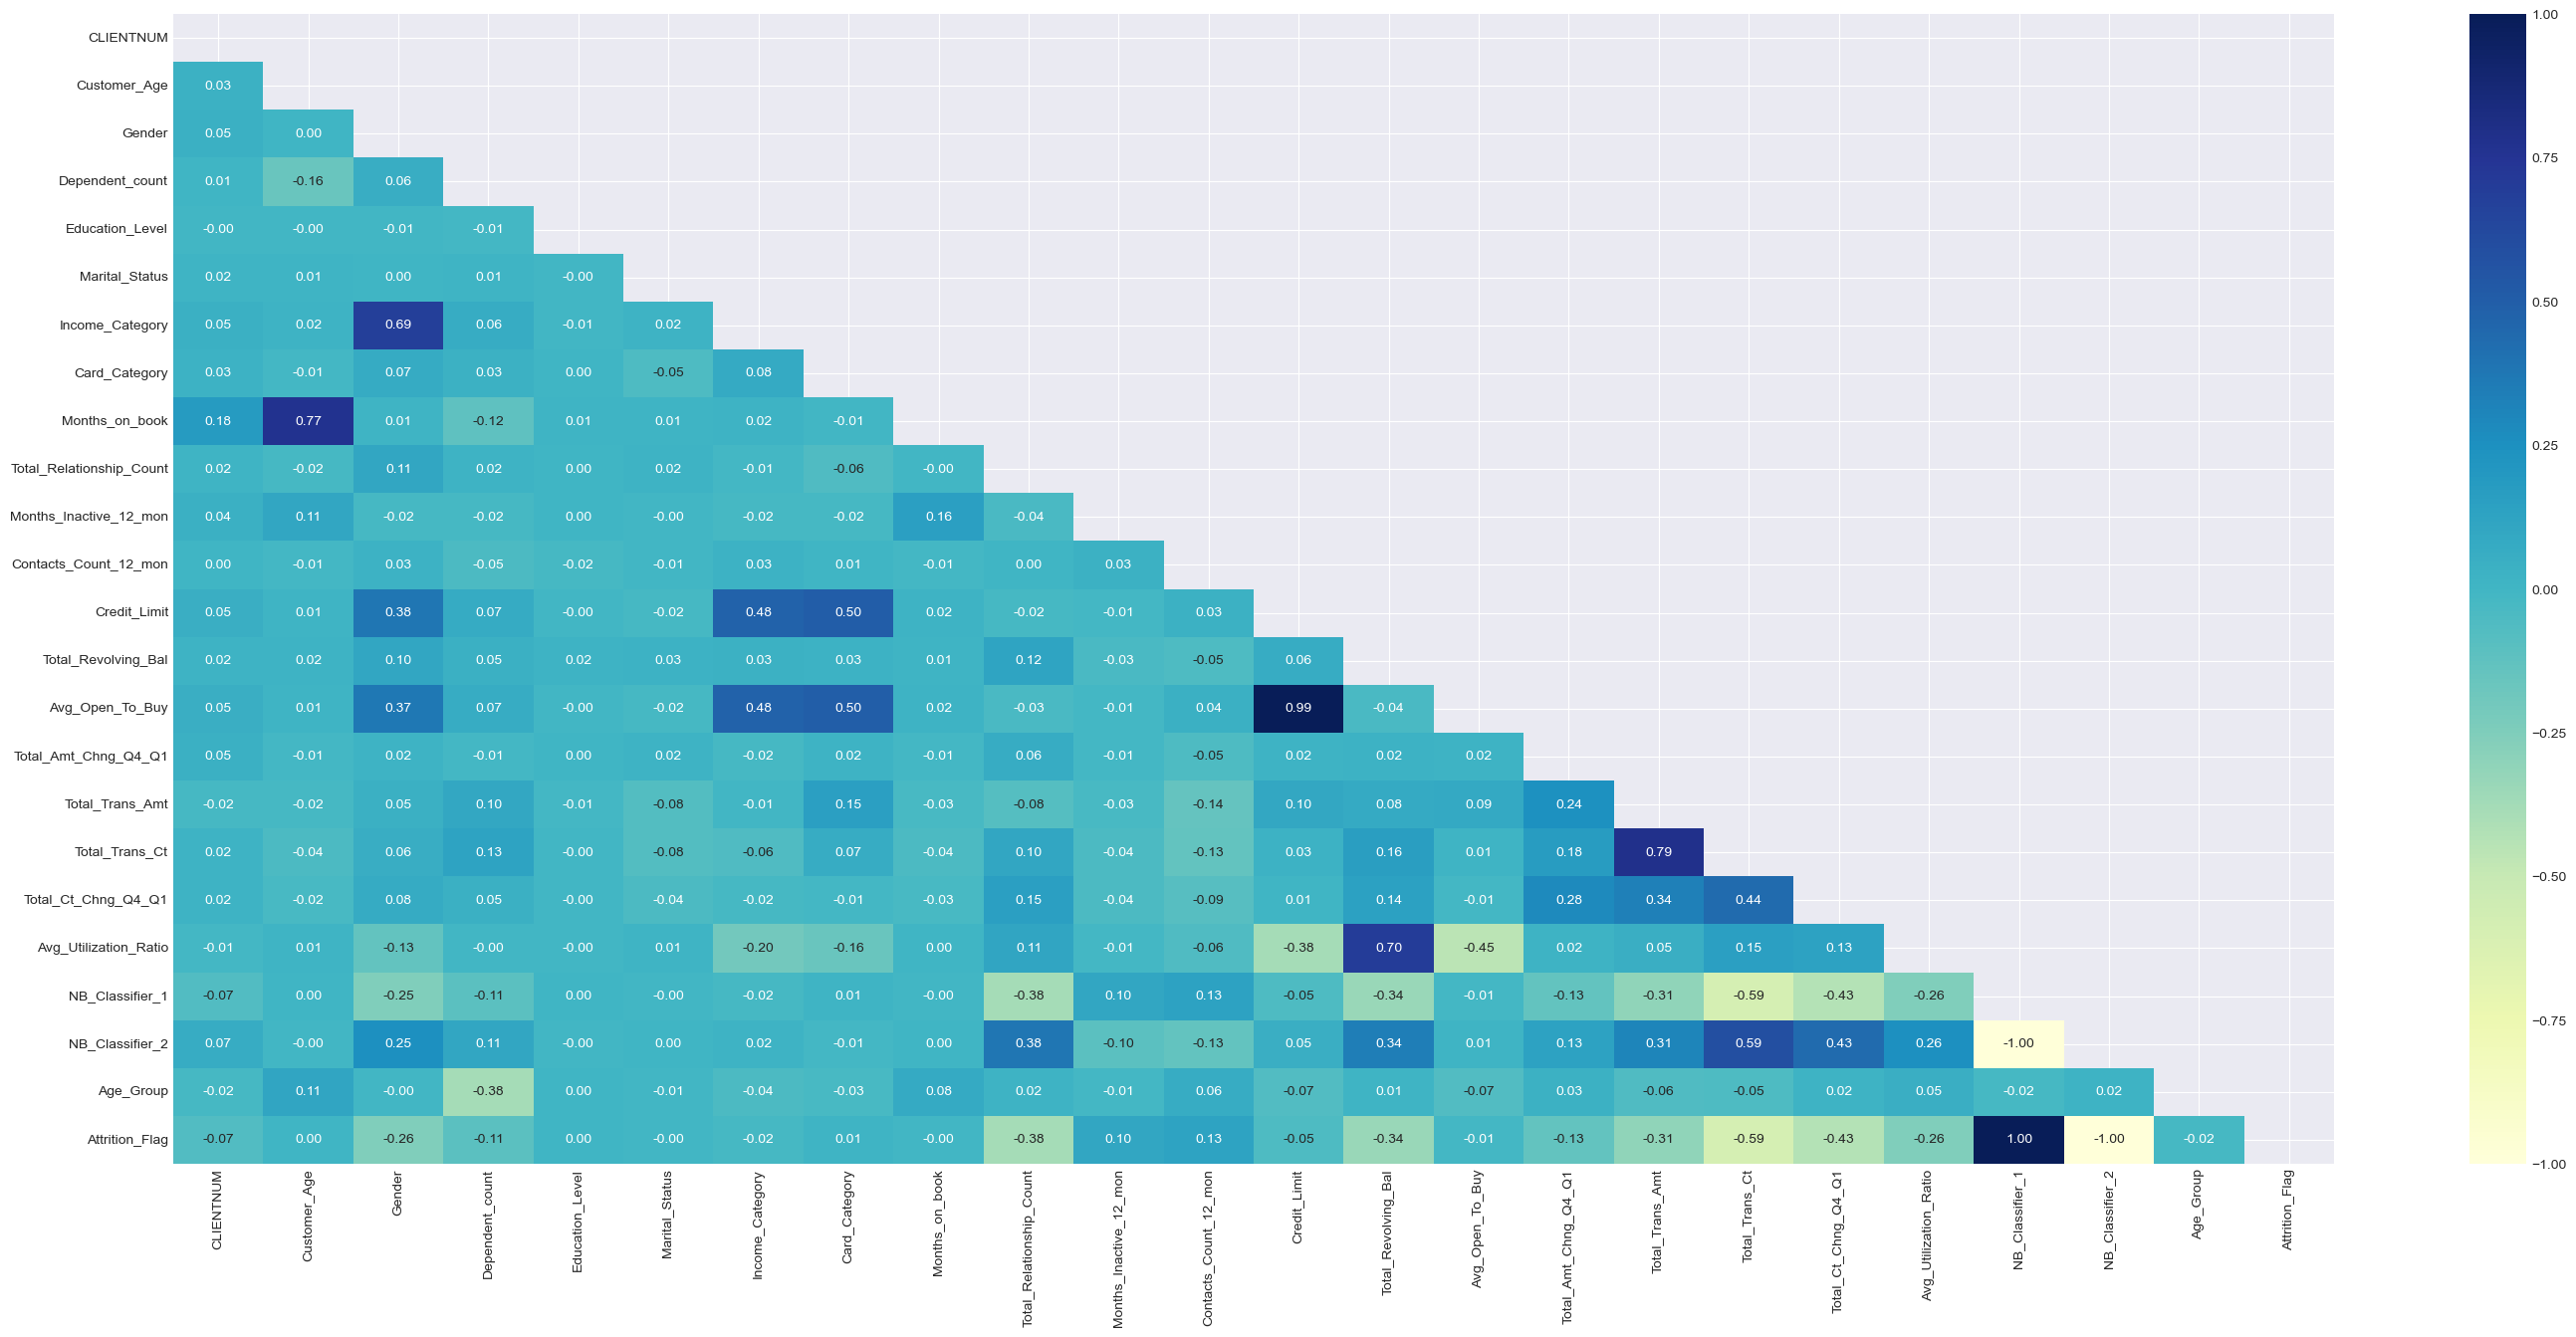

In [93]:
corr = NR_Xtrain_df.corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [94]:
NR_Xtrain_df.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'NB_Classifier_1', 'NB_Classifier_2', 'Age_Group', 'Attrition_Flag'],
      dtype='object')

In [95]:
columntoDrop = ['Avg_Open_To_Buy', 'NB_Classifier_1', 'NB_Classifier_2' ]
NR_Xtest_df.drop(columns=columntoDrop, inplace= True)
NR_Xtrain_df.drop(columns=columntoDrop, inplace= True)


<Axes: >

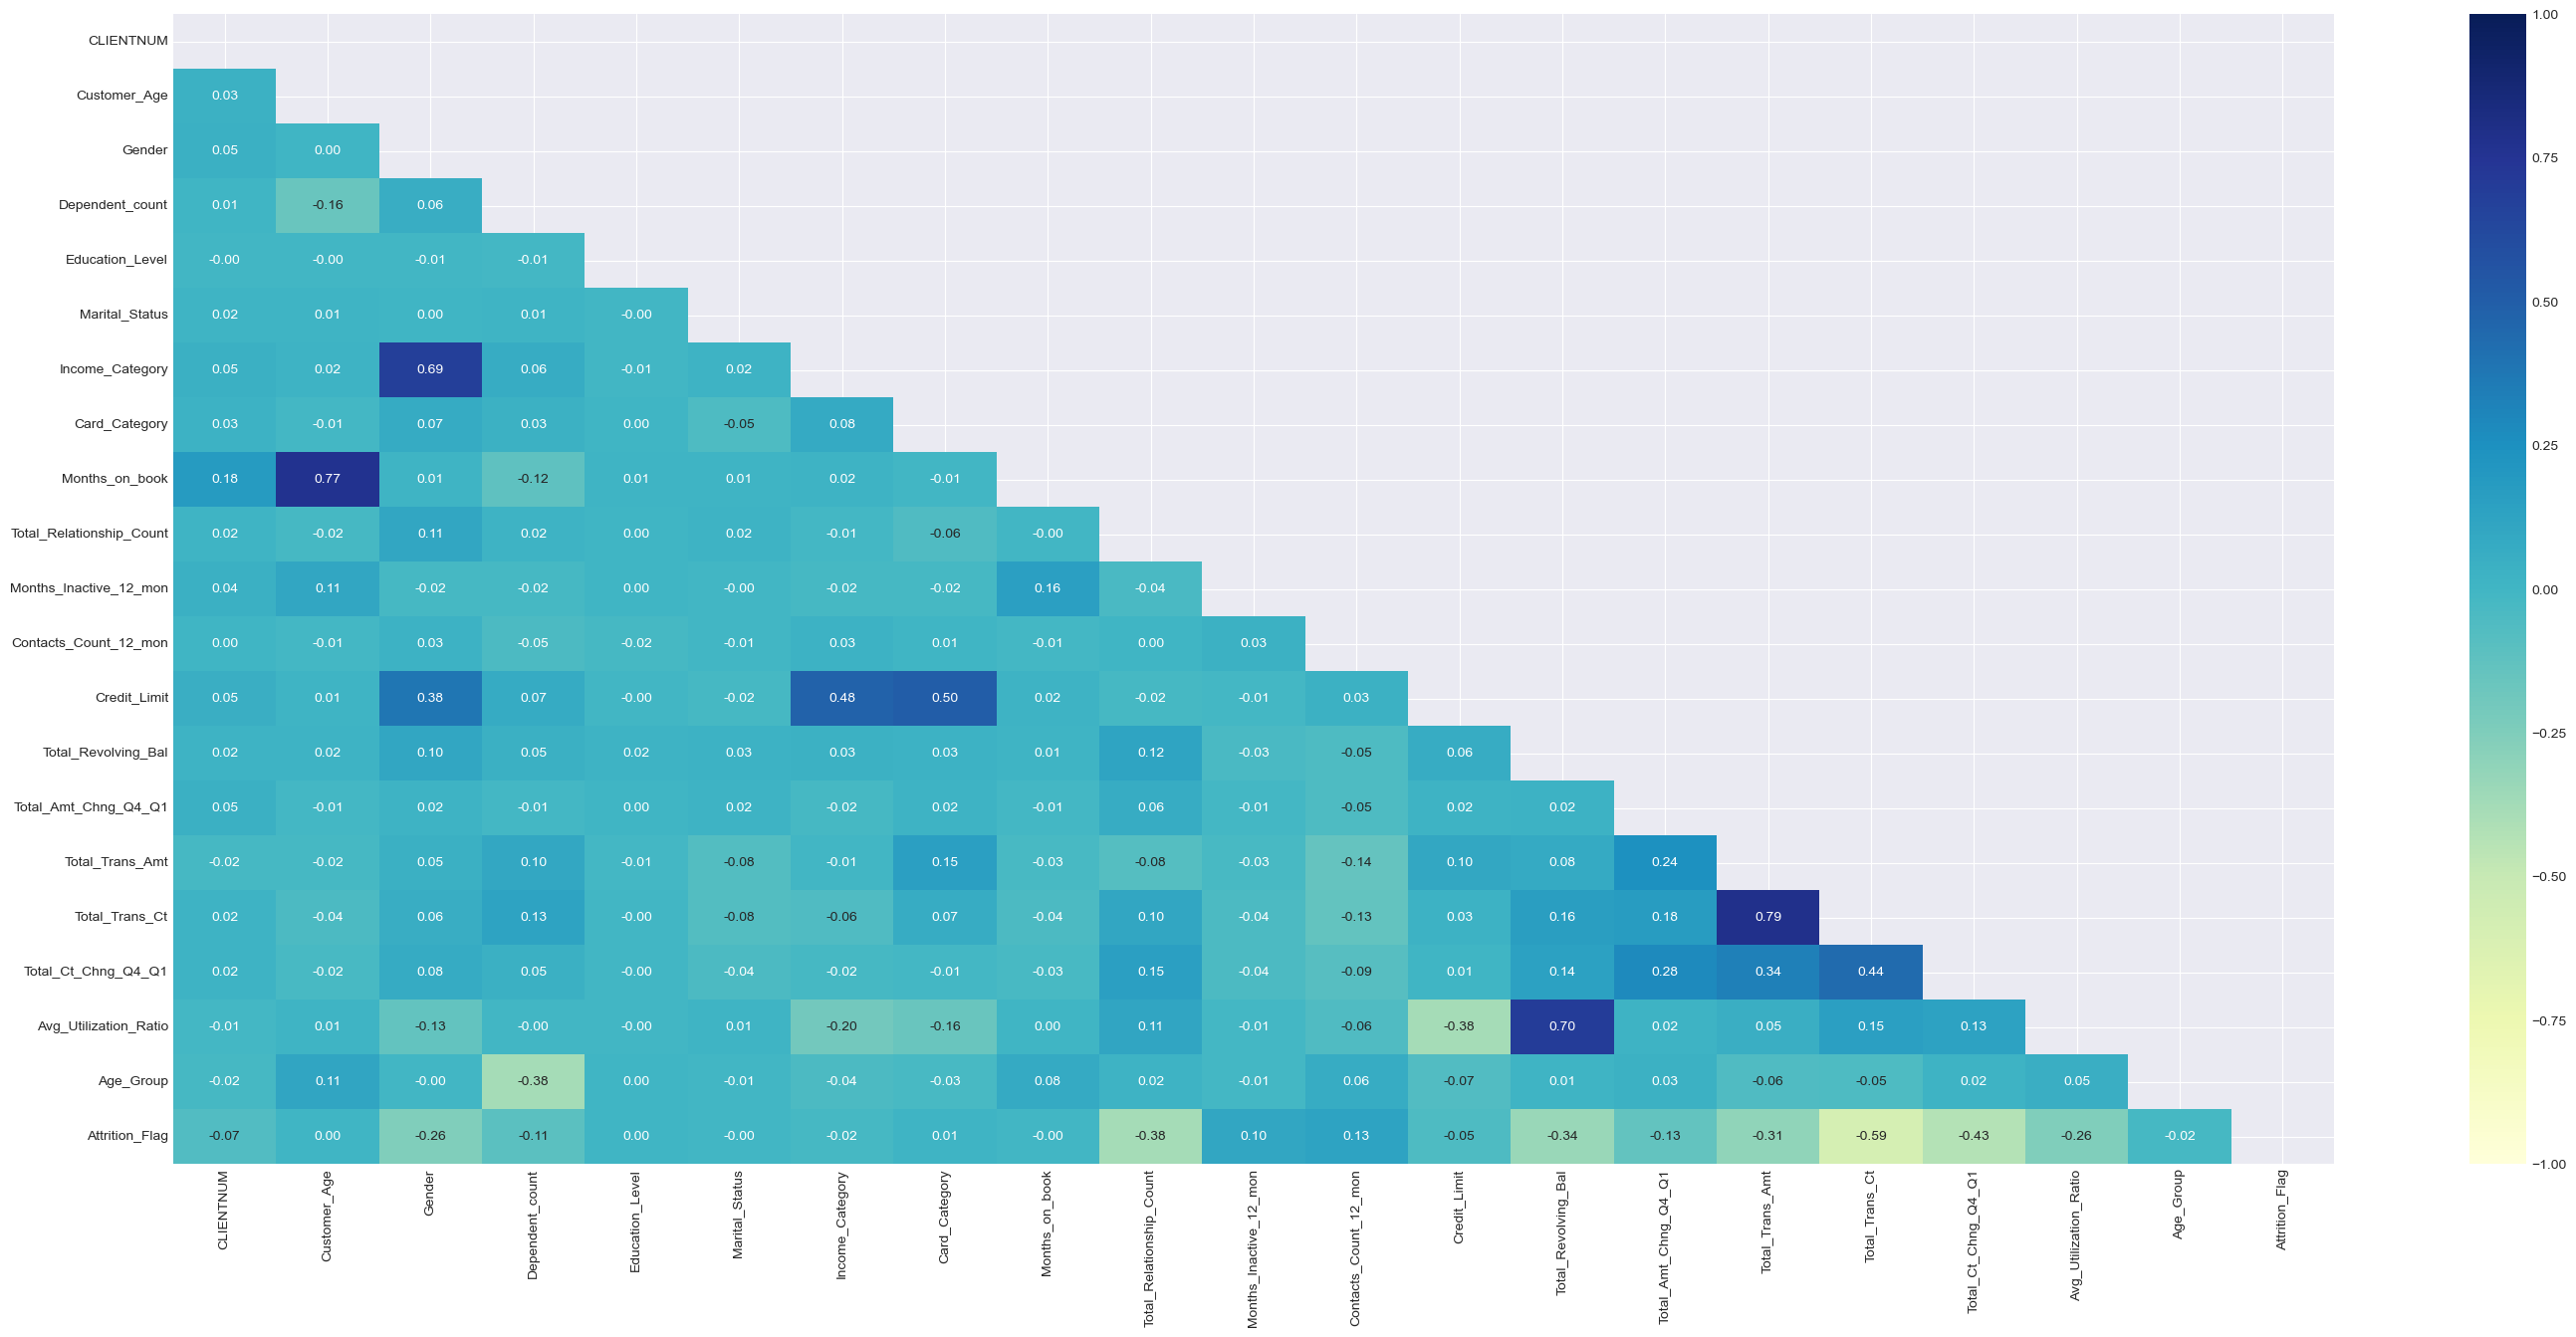

In [96]:
corr = NR_Xtrain_df.corr()
plt.figure(figsize=(35, 15))
sb.heatmap(corr, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, fmt=".2f", mask=np.triu(np.ones_like(corr, dtype=bool)))

In [97]:
NR_Xtrain_df = NR_Xtrain_df.drop(columns = 'Attrition_Flag')

In [98]:
NR_Xtrain_df.shape

(11434, 20)

In [99]:
from sklearn.feature_selection import RFE
X = NR_Xtrain_df.values
Y = y_train
model = RandomForestClassifier() 
rfe = RFE(model, n_features_to_select= 6)
fit = rfe.fit(X,Y) 
print(fit.support_)
print(fit.ranking_)

[False False False False False False False False False  True False False
 False  True  True  True  True  True False False]
[15  6  3 13 11  5  4 14 10  1  9 12  8  1  1  1  1  1  2  7]


In [100]:
RFE_ = [name for name, value in zip(NR_Xtrain_df.columns, fit.ranking_) if value == 1]
len(RFE_)

6

In [101]:
RFE_

['Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [102]:
X_train = NR_Xtrain_df[RFE_].values
X_test = NR_Xtest_df[RFE_].values

In [103]:
# Spot-Check Classifier Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('Ridge', RidgeClassifier()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.740076 (0.014724)
Ridge: 0.743486 (0.012473)
Lasso: nan (nan)
KNN: 0.729580 (0.008867)
CART: 0.924435 (0.006277)
RF: 0.952510 (0.007766)
SVM: 0.751184 (0.011691)


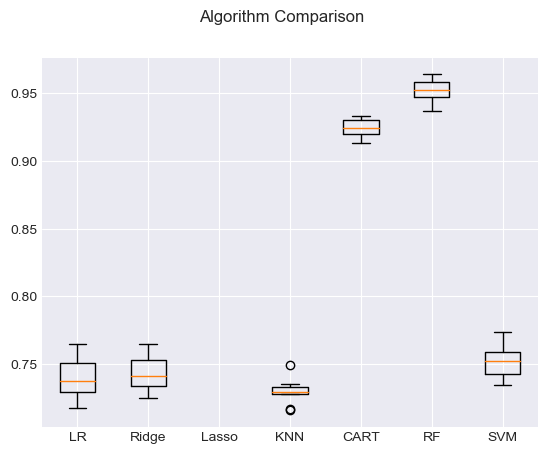

In [104]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [105]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [106]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [107]:
# Evaluate the model and print the results
print(classification_report(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1431
           1       0.94      0.92      0.93      1431

    accuracy                           0.93      2862
   macro avg       0.93      0.93      0.93      2862
weighted avg       0.93      0.93      0.93      2862

F1-score:  0.9307909604519774


In [108]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1348   83]
 [ 113 1318]]


## Plotting ROC curve

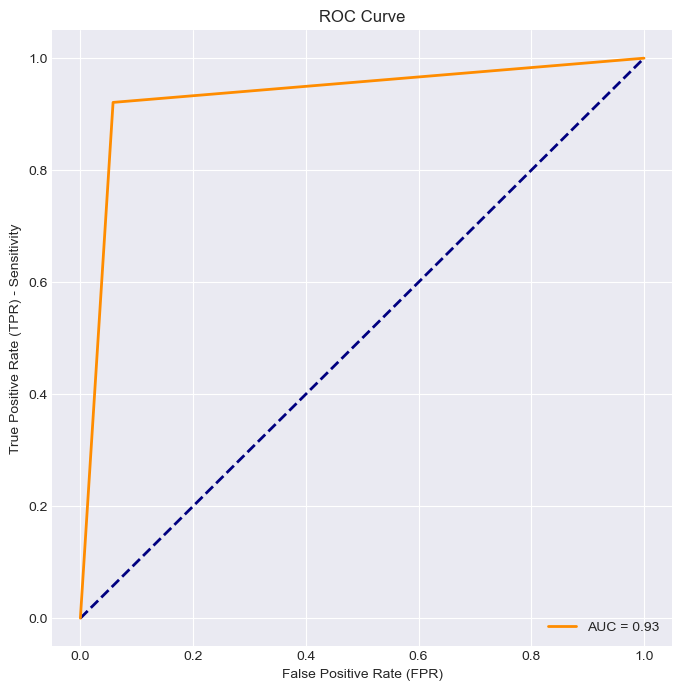

In [109]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
#plot the diagonal 50% LINE
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plot the fpr, tpr achieved by our model
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) - Sensitivity')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Second Stage

In [110]:
X_train, X_test, y_train, y_test = (
    transformed_X_train[RFE_],
    transformed_X_test[RFE_],
    transformed_y_train,
    transformed_y_test
)


In [111]:
#Rescaling
scaler = MinMaxScaler(feature_range = (0,1)).fit(X_train)
R_Xtrain = scaler.transform(X_train)
R_Xtest = scaler.transform(X_test)


#Normalization
normalizer = Normalizer().fit(R_Xtrain)
NR_Xtrain = normalizer.transform(R_Xtrain)
NR_Xtest = normalizer.transform(R_Xtest)

In [112]:
X_train = NR_Xtrain
X_test= NR_Xtest

In [113]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1431
           1       0.86      0.84      0.85      1431

    accuracy                           0.85      2862
   macro avg       0.85      0.85      0.85      2862
weighted avg       0.85      0.85      0.85      2862

F1-score:  0.8518781006378454


## Deployment

In [114]:
#saving the model
with open('model_and_transformers2.sav', 'wb') as file:
    pickle.dump((model, scaler, normalizer), file)

In [115]:
# Load the model and transformers
with open('model_and_transformers2.sav', 'rb') as file:
    loaded_model, scaler, normalizer = pickle.load(file)

In [116]:
input_data = (180, 80, 54, 0.007880,43,5)

#changing the input data to numpy array
input2np = np.asarray(input_data)
#reshape the array as we are predicing for one instance
reshape_array = input2np.reshape(1,-1)
prediction = loaded_model.predict(reshape_array)
print(prediction)

if prediction[0] == 1:
    print('The customer is on the verge of churning.')
else:
    print('The customer is not on the verge of churning')

[1]
The customer is on the verge of churning.


In [117]:
RFE_

['Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [118]:
def make_prediction(rel_count, revol_bal, amt_chng_q4_q1, trans_amt, trans_ct, ct_chng_q4_q1):
    data = {
        'Total_Relationship_Count': [rel_count],
        'Total_Revolving_Bal': [revol_bal],
        'Total_Amt_Chng_Q4_Q1': [amt_chng_q4_q1],
        'Total_Trans_Amt': [trans_amt],
        'Total_Trans_Ct': [trans_ct],
        'Total_Ct_Chng_Q4_Q1': [ct_chng_q4_q1]
    }
    df = pd.DataFrame(data)
    df2array = np.asarray(df)
    reshape_array = df2array.reshape(1, -1)

    print("Input Data Before Transformation:")
    print(df)
    
    def transformation(reshape_array):
        scaler_reshape = scaler.transform(reshape_array)
        normalizer_reshape = normalizer.transform(scaler_reshape)
        return normalizer_reshape

    # Transform data
    transformed_data = transformation(reshape_array)

    print("Transformed Data:")
    print(transformed_data)

    # Make prediction
    prediction = loaded_model.predict(transformed_data)
    
    print(f"Prediction: {prediction}")

    return prediction[0]


In [119]:
make_prediction(5,1467,0.831,1201,42,0.680)

Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                         5                 1467                 0.831   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0             1201              42                 0.68  
Transformed Data:
[[0.61879025 0.45081709 0.45897462 0.06592009 0.24030689 0.37564879]]
Prediction: [0]


0

In [120]:
df1[RFE_]

Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
10                            5                 1467                 0.831   
14                            5                  680                 1.190   
19                            6                 1157                 0.966   
20                            5                 1800                 0.906   
21                            2                    0                 1.047   
...                         ...                  ...                   ...   
10054                         1                 1180                 0.645   
10067                         5                    0                 0.581   
10089                         4                    0                 0.840   
10103                         4                    0                 0.799   
10125                         4                    0                 0.535   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
10                1201              42                0.680  
14                1570              29                0.611  
19                1207              21                0.909  
20                1178              27                0.929  
21                 692              16                0.600  
...                ...             ...                  ...  
10054             8130              74                0.897  
10067             7590              87                0.776  
10089             7636              64                0.829  
10103             8531              77                0.791  
10125             8395              62                0.722  

[8586 rows x 6 columns]

## 3rd Stage

In [121]:
from sklearn.feature_selection import RFE
X = NR_Xtrain_df.values
Y = y_train
model = RidgeClassifier()
rfe = RFE(model, n_features_to_select= 6)
fit = rfe.fit(X,Y) 
print(fit.support_)
print(fit.ranking_)

[False False False  True False False False False False  True  True  True
 False False False False  True  True False False]
[15  2  7  1 11 10  4  5  3  1  1  1 14  9 13 12  1  1  6  8]


In [122]:
RFE2 = [name for name, value in zip(NR_Xtrain_df.columns, fit.ranking_) if value == 1]
len(RFE2)

6

In [123]:
RFE2

['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [124]:
X_train, X_test, y_train, y_test = (
    transformed_X_train[RFE2],
    transformed_X_test[RFE2],
    transformed_y_train,
    transformed_y_test
)

#Rescaling
scaler2 = MinMaxScaler(feature_range = (0,1)).fit(X_train)
R_Xtrain = scaler2.transform(X_train)
R_Xtest = scaler2.transform(X_test)


#Normalization
normalizer2 = Normalizer().fit(R_Xtrain)
NR_Xtrain = normalizer2.transform(R_Xtrain)
NR_Xtest = normalizer2.transform(R_Xtest)


X_train = NR_Xtrain
X_test= NR_Xtest


model2 = RidgeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

# Evaluate the model and print the results
print(classification_report(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1431
           1       0.78      0.77      0.78      1431

    accuracy                           0.78      2862
   macro avg       0.78      0.78      0.78      2862
weighted avg       0.78      0.78      0.78      2862

F1-score:  0.7789103690685412


In [125]:
#saving the model
with open('model2_and_transformers2.sav', 'wb') as file:
    pickle.dump((model2, scaler2, normalizer2), file)

In [126]:
# Load the  second model and transformers
with open('model2_and_transformers2.sav', 'rb') as file:
    loaded_model2, scaler2, normalizer2 = pickle.load(file)

## Integrating more than two models

In [127]:
RFE_

['Total_Relationship_Count',
 'Total_Revolving_Bal',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [128]:
RFE2

['Dependent_count',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [129]:
totalFeatures = set(RFE_ + RFE2)
totalFeatures = list(totalFeatures)

In [130]:
totalFeatures

['Total_Revolving_Bal',
 'Contacts_Count_12_mon',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Trans_Ct',
 'Months_Inactive_12_mon',
 'Total_Trans_Amt',
 'Total_Amt_Chng_Q4_Q1',
 'Dependent_count',
 'Total_Relationship_Count']

In [131]:
def hybrid_prediction(trans_ct, dep_count, inactive_months, Contacts_Count, revol_bal, rel_count, trans_amt,amt_chng_q4_q1, ct_chng_q4_q1):
    #prediction for first model
    data = {
        'Total_Relationship_Count': [rel_count],
        'Total_Revolving_Bal': [revol_bal],
        'Total_Amt_Chng_Q4_Q1': [amt_chng_q4_q1],
        'Total_Trans_Amt': [trans_amt],
        'Total_Trans_Ct': [trans_ct],
        'Total_Ct_Chng_Q4_Q1': [ct_chng_q4_q1]
    }
    df = pd.DataFrame(data)
    df2array = np.asarray(df)
    reshape_array = df2array.reshape(1, -1)

    print("Input Data Before Transformation:")
    print(df)
    
    def transformation(reshape_array):
        scaler_reshape = scaler.transform(reshape_array)
        normalizer_reshape = normalizer.transform(scaler_reshape)
        return normalizer_reshape

    # Transform data
    transformed_data = transformation(reshape_array)

    print("Transformed Data:")
    print(transformed_data)

    # Make prediction1
    prediction1 = loaded_model.predict(transformed_data)
    
    print('prediction1', prediction1)
    
    data2 = {
        
        'Dependent_count' :  [dep_count],
        'Total_Relationship_Count' : [rel_count],
        'Months_Inactive_12_mon': [inactive_months],
        'Contacts_Count_12_mon': [Contacts_Count],
        'Total_Trans_Ct': [trans_ct],
        'Total_Ct_Chng_Q4_Q1' : [ct_chng_q4_q1]
        
    }
   

    dfx = pd.DataFrame(data2)
    dfxarray = np.asarray(dfx)
    reshapex_array = dfxarray.reshape(1, -1)

    print("Input Data2 Before Transformation:")
    print(dfx)
    
    def transformation2(reshapex_array):
        scaler_reshapex = scaler2.transform(reshapex_array)
        normalizer_reshapex = normalizer2.transform(scaler_reshapex)
        return normalizer_reshapex
    
     # Transform data
    transformed_data2 = transformation2(reshapex_array)

    print("Transformed Data2:")
    print(transformed_data2)
    
    # Make prediction2
    prediction2 = loaded_model2.predict(transformed_data2)
    print('prediction2', prediction2)
    
    final_prediction = (prediction1 + prediction2) / 2
    
    if prediction1 != prediction2:
        return prediction1[0]
    
    else:
        
        return final_prediction[0]

In [132]:
5,1467,0.831,1201,42,0.680
[0.61879025 0.45081709 0.45897462 0.06592009 0.24030689 0.37564879]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (468208176.py, line 2)

In [133]:
hybrid_prediction(42, 5, 3, 2, 1467, 5, 1201, 0.831,0.680)

Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                         5                 1467                 0.831   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0             1201              42                 0.68  
Transformed Data:
[[0.61879025 0.45081709 0.45897462 0.06592009 0.24030689 0.37564879]]
prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0                5                         5                       3   

   Contacts_Count_12_mon  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                      2              42                 0.68  
Transformed Data2:
[[0.65463107 0.52370486 0.32731554 0.21821036 0.20338053 0.31792534]]
prediction2 [1]


0

In [157]:
c = df1[totalFeatures].head(35)
c

Total_Revolving_Bal  Contacts_Count_12_mon  Total_Ct_Chng_Q4_Q1  \
10                 1467                      2                0.680   
14                  680                      2                0.611   
19                 1157                      2                0.909   
20                 1800                      0                0.929   
21                    0                      3                0.600   
23                 1560                      2                0.353   
24                    0                      3                0.750   
25                 1669                      2                0.833   
27                 1010                      2                1.000   
29                 1362                      0                0.900   
34                 1696                      2                0.714   
35                 1914                      1                0.483   
40                  578                      2                0.474   
41                 2204                      0                0.556   
44                 2055                      3                0.917   
48                 1435                      3                0.800   
49                 1227                      1                0.600   
51                  808                      1                0.900   
53                 2517                      0                0.250   
54                    0                      3                0.364   
55                 2200                      2                0.600   
56                 2363                      0                0.600   
60                 2016                      3                0.833   
61                    0                      4                0.500   
62                 1251                      3                1.154   
63                 2102                      2                0.733   
64                 1634                      2                0.917   
65                 1515                      4                0.600   
66                 1817                      3                0.667   
67                 1468                      3                0.556   
71                 1034                      3                0.286   
72                 2030                      3                0.400   
73                 1528                      2                0.522   
75                 1515                      2                0.435   
77                 1801                      2                0.966   

    Total_Trans_Ct  Months_Inactive_12_mon  Total_Trans_Amt  \
10              42                       3             1201   
14              29                       2             1570   
19              21                       1             1207   
20              27                       2             1178   
21              16                       3              692   
23              23                       3             1126   
24              21                       2             1110   
25              22                       1             1051   
27              40                       3             1904   
29              38                       0             1045   
34              24                       2             1291   
35              43                       2             1407   
40              28                       2             1109   
41              28                       1             1347   
44              23                       3             1042   
48              27                       3             1217   
49              40                       1             1140   
51              19                       3              705   
53              35                       2             1414   
54              15                       3              602   
55              32                       4             1052   
56              40                       2             1295  

In [161]:
df1['Attrition_Flag'].head(35)

10    Existing Customer
14    Existing Customer
19    Existing Customer
20    Existing Customer
21    Attrited Customer
23    Existing Customer
24    Existing Customer
25    Existing Customer
27    Existing Customer
29    Existing Customer
34    Existing Customer
35    Existing Customer
40    Existing Customer
41    Existing Customer
44    Existing Customer
48    Existing Customer
49    Existing Customer
51    Attrited Customer
53    Existing Customer
54    Attrited Customer
55    Existing Customer
56    Existing Customer
60    Existing Customer
61    Attrited Customer
62    Existing Customer
63    Existing Customer
64    Existing Customer
65    Existing Customer
66    Existing Customer
67    Existing Customer
71    Existing Customer
72    Existing Customer
73    Existing Customer
75    Existing Customer
77    Existing Customer
Name: Attrition_Flag, dtype: object

In [162]:
c['predicted_result'] = c.apply(lambda row: hybrid_prediction(row['Total_Trans_Ct'], row['Dependent_count'],
                                                               row['Months_Inactive_12_mon'], row['Contacts_Count_12_mon'],
                                                               row['Total_Revolving_Bal'], row['Total_Relationship_Count'],
                                                               row['Total_Trans_Amt'], row['Total_Amt_Chng_Q4_Q1'],
                                                               row['Total_Ct_Chng_Q4_Q1']), axis=1)


Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       5.0               1467.0                 0.831   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0           1201.0            42.0                 0.68  
Transformed Data:
[[0.61879025 0.45081709 0.45897462 0.06592009 0.24030689 0.37564879]]
prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              5.0                       5.0                     3.0   

   Contacts_Count_12_mon  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                    2.0            42.0                 0.68  
Transformed Data2:
[[0.65463107 0.52370486 0.32731554 0.21821036 0.20338053 0.31792534]]
prediction2 [1]
Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       5.0                680.0                  1.19   

 

prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              0.0                       6.0                     2.0   

   Contacts_Count_12_mon  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                    2.0            24.0                0.714  
Transformed Data2:
[[0.         0.81335528 0.27111843 0.27111843 0.11055315 0.42334476]]
prediction2 [0]
Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       4.0               1914.0                  0.51   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0           1407.0            43.0                0.483  
Transformed Data:
[[0.54850239 0.69516195 0.22927439 0.10113605 0.29288963 0.25945212]]
prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              1.0                       4.0                 

prediction1 [1]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              2.0                       2.0                     4.0   

   Contacts_Count_12_mon  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                    4.0            15.0                  0.5  
Transformed Data2:
[[0.36792058 0.18396029 0.61320097 0.61320097 0.04465056 0.27707134]]
prediction2 [1]
Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       5.0               1251.0                 0.944   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0           1316.0            28.0                1.154  
Transformed Data:
[[0.51849047 0.32212533 0.46274029 0.06442762 0.11326248 0.62951967]]
prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              1.0                       5.0                 

In [160]:
c

Total_Revolving_Bal  Contacts_Count_12_mon  Total_Ct_Chng_Q4_Q1  \
10                 1467                      2                0.680   
14                  680                      2                0.611   
19                 1157                      2                0.909   
20                 1800                      0                0.929   
21                    0                      3                0.600   
23                 1560                      2                0.353   
24                    0                      3                0.750   
25                 1669                      2                0.833   
27                 1010                      2                1.000   
29                 1362                      0                0.900   
34                 1696                      2                0.714   
35                 1914                      1                0.483   
40                  578                      2                0.474   
41                 2204                      0                0.556   
44                 2055                      3                0.917   
48                 1435                      3                0.800   
49                 1227                      1                0.600   
51                  808                      1                0.900   
53                 2517                      0                0.250   
54                    0                      3                0.364   
55                 2200                      2                0.600   
56                 2363                      0                0.600   
60                 2016                      3                0.833   
61                    0                      4                0.500   
62                 1251                      3                1.154   
63                 2102                      2                0.733   
64                 1634                      2                0.917   
65                 1515                      4                0.600   
66                 1817                      3                0.667   
67                 1468                      3                0.556   
71                 1034                      3                0.286   
72                 2030                      3                0.400   
73                 1528                      2                0.522   
75                 1515                      2                0.435   
77                 1801                      2                0.966   

    Total_Trans_Ct  Months_Inactive_12_mon  Total_Trans_Amt  \
10              42                       3             1201   
14              29                       2             1570   
19              21                       1             1207   
20              27                       2             1178   
21              16                       3              692   
23              23                       3             1126   
24              21                       2             1110   
25              22                       1             1051   
27              40                       3             1904   
29              38                       0             1045   
34              24                       2             1291   
35              43                       2             1407   
40              28                       2             1109   
41              28                       1             1347   
44              23                       3             1042   
48              27                       3             1217   
49              40                       1             1140   
51              19                       3              705   
53              35                       2             1414   
54              15                       3              602   
55              32                       4             1052   
56              40                       2             1295  

In [165]:
n = df1[totalFeatures]
n['attrited'] = df1['Attrition_Flag']

In [175]:
n = n.sample(400)

In [178]:
n.to_csv('customer_churn_sample.csv', index= False)

In [170]:
c_attrit = n.head(30)
c = c_attrit.drop(columns=['attrited'])

In [173]:
c['predicted_result'] = c.apply(lambda row: hybrid_prediction(row['Total_Trans_Ct'], row['Dependent_count'],
                                                               row['Months_Inactive_12_mon'], row['Contacts_Count_12_mon'],
                                                               row['Total_Revolving_Bal'], row['Total_Relationship_Count'],
                                                               row['Total_Trans_Amt'], row['Total_Amt_Chng_Q4_Q1'],
                                                               row['Total_Ct_Chng_Q4_Q1']), axis=1)

c['predicted_result'] = c['predicted_result'].map(lambda x : 'Attrited Customer' if x == 1 else 'Existing Customer')

Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       6.0                  0.0                 0.638   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0           4223.0            79.0                0.717  
Transformed Data:
[[0.69292794 0.         0.26844487 0.31732134 0.46419444 0.36279321]]
prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              3.0                       6.0                     3.0   

   Contacts_Count_12_mon  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                    1.0            79.0                0.717  
Transformed Data2:
[[0.39051142 0.65085237 0.32542618 0.10847539 0.4360079  0.34076389]]
prediction2 [0]
Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       5.0                  0.0                 0.714   

 

prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              3.0                       3.0                     3.0   

   Contacts_Count_12_mon  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                    3.0            26.0                  1.0  
Transformed Data2:
[[0.45937542 0.30625028 0.38281285 0.38281285 0.11893215 0.62285534]]
prediction2 [1]
Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       2.0                710.0                 0.434   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0           2562.0            38.0                0.462  
Transformed Data:
[[0.33561844 0.47335935 0.28475631 0.42469724 0.45618041 0.44015534]]
prediction1 [1]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              2.0                       2.0                 

prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              3.0                       5.0                     2.0   

   Contacts_Count_12_mon  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0                    2.0            68.0                0.619  
Transformed Data2:
[[0.45771234 0.61028312 0.25428463 0.25428463 0.42956822 0.32280601]]
prediction2 [0]
Input Data Before Transformation:
   Total_Relationship_Count  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
0                       2.0                985.0                 0.592   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0           7333.0            91.0                0.596  
Transformed Data:
[[0.14932616 0.29218567 0.25259548 0.62830068 0.58715626 0.29834632]]
prediction1 [0]
Input Data2 Before Transformation:
   Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              3.0                       2.0                 

In [174]:
c

Total_Revolving_Bal  Contacts_Count_12_mon  Total_Ct_Chng_Q4_Q1  \
7644                    0                      1                0.717   
2374                    0                      2                0.634   
3880                 1655                      4                0.821   
1167                  930                      3                0.608   
6199                    0                      3                0.706   
6785                 2517                      2                0.484   
2022                  876                      3                1.048   
8216                 1595                      3                0.582   
4862                 1894                      2                0.789   
3247                 2043                      3                0.750   
6675                    0                      3                0.537   
1052                 2005                      3                1.000   
9135                  710                      2                0.462   
3881                 1403                      3                0.758   
1743                    0                      3                0.929   
8016                  458                      2                0.444   
857                  1479                      3                0.581   
5778                 1190                      2                0.741   
3647                 1909                      3                0.848   
5979                  825                      3                0.733   
6670                 2495                      1                0.886   
230                  1025                      3                0.714   
7248                  908                      2                0.897   
7429                 1697                      3                1.029   
1208                  651                      4                0.585   
6190                    0                      4                0.781   
5295                 1452                      2                0.619   
8827                  985                      1                0.596   
1574                 1812                      2                0.760   
3644                 1931                      1                0.660   

      Total_Trans_Ct  Months_Inactive_12_mon  Total_Trans_Amt  \
7644              79                       3             4223   
2374              67                       3             2449   
3880              71                       1             4961   
1167              82                       3             4449   
6199              87                       2             4683   
6785              46                       2             2828   
2022              43                       3             1753   
8216              87                       2             4766   
4862              68                       2             4660   
3247              84                       1             4550   
6675              63                       2             4215   
1052              26                       3             1561   
9135              38                       1             2562   
3881              58                       3             2730   
1743              54                       2             2160   
8016              39                       3             2383   
857               49                       3             1537   
5778              94                       3             4430   
3647              61                       1             4048   
5979              52                       2             2022   
6670              83                       3             4370   
230               12                       4              702   
7248              74                       3             4653   
7429              71                       2             4651   
1208              65                       1             3165   
6190              57                       3        

In [ ]:
Dependent_count =
Months_Inactive_12_mon =
Contacts_Count_12_mon = 

In [141]:
df1.Contacts_Count_12_mon.max()

6

In [ ]:
n = df1[RFE_]

In [ ]:
n['Attrited_Flag'] = df1['Attrition_Flag']

In [ ]:
n['Attrited_Flag'] = n['Attrited_Flag'].map(lambda x : 1 if x == 'Attrited Customer' else 0)

In [ ]:
zero_flag = n[n['Attrited_Flag'].apply(lambda x : x == 0)]
one_flag = n[n['Attrited_Flag'].apply(lambda x : x == 1)]

In [ ]:
zero_flag['pred'] = loaded_model.predict(zero_flag[RFE_])

In [ ]:
zero_flag

In [ ]:
one_flag['pred'] = loaded_model.predict(one_flag[RFE_])

In [ ]:
one_flag

In [ ]:
testRun = n[RFE_].head(200)

In [ ]:
testRun.to_csv('testRun.csv', index= False)

In [ ]:
testRun

In [ ]:
testRun = n[RFE_]
testRun['attrited'] = n['Attrited_Flag']

In [ ]:
testRun.head(50)